In [18]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
import seaborn as sns
import Bio
from Bio import AlignIO
import numpy as np


In [19]:
os.getcwd()

'/Users/yasmine/Library/CloudStorage/OneDrive-ETHZurich/25_HS/Prakti/chikungunya/scripts'

## EDA of raw data

In [20]:
filepath = "../ingest/data/ncbi.ndjson"
df = pd.read_json(filepath, lines = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8713 entries, 0 to 8712
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   genbank_accession      8713 non-null   object
 1   genbank_accession_rev  8713 non-null   object
 2   database               8713 non-null   object
 3   strain                 8713 non-null   object
 4   region                 8713 non-null   object
 5   location               8713 non-null   object
 6   collected              8713 non-null   object
 7   submitted              8713 non-null   object
 8   updated                8713 non-null   object
 9   length                 8713 non-null   int64 
 10  host                   8713 non-null   object
 11  isolation_source       8713 non-null   object
 12  bioproject_accession   8713 non-null   object
 13  biosample_accession    8713 non-null   object
 14  sra_accession          8713 non-null   object
 15  authors              

In [22]:
df = df.replace(to_replace='', value=np.nan)

In [23]:
df.describe(include='object')

genbank_accession genbank_accession_rev database            strain  \
count               8713                  8713     8713              7592   
unique              8713                  8713        2              7003   
top             KY680383            KY680383.1  GenBank  Caribbean strain   
freq                   1                     1     8712                20   

       region location collected             submitted               updated  \
count    7551     7565      7134                  8713                  8713   
unique      6      689      1982                   647                   563   
top      Asia    India      2010  2023-06-30T00:00:00Z  2016-07-25T00:00:00Z   
freq     4135     1290       335                   425                   426   

                host isolation_source bioproject_accession  \
count           7219             3537                  307   
unique            28               14                   13   
top     Homo sapiens            blood          PRJNA294670   
freq            6826             3367                  205   

       biosample_accession sra_accession  \
count                   49            49   
unique                  45            45   
top           SAMN48945982   SRR33875775   
freq                     2             2   

                                                  authors  \
count                                                8712   
unique                                                715   
top     Xavier,J.,Fonseca,V.,Oliveira,C.,Lima,M.,Frits...   
freq                                                  425   

                                              institution  \
count                                                7689   
unique                                                477   
top     Pan American Health Organization (PAHO), PHE-B...   
freq                                                  703   

                                                 sequence  
count                                                8713  
unique                                               5580  
top     ATAGAGCAGGAAATTGATCCCGACTCAACCATCCTGGATATCGGCA...  
freq                                                  154

In [24]:
print(df['region'].unique())

['North America' 'South America' 'Asia' 'Oceania' 'Africa' nan 'Europe']


['genbank_accession', 'genbank_accession_rev', 'database', 'strain', 'region', 'location', 'collected', 'submitted', 'updated', 'host', 'isolation_source', 'bioproject_accession', 'biosample_accession', 'sra_accession', 'authors', 'institution', 'sequence']
Skipping genbank_accession (all values unique)
Skipping genbank_accession_rev (all values unique)
  database  count
0  GenBank   8712
1   RefSeq      1


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_3352/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


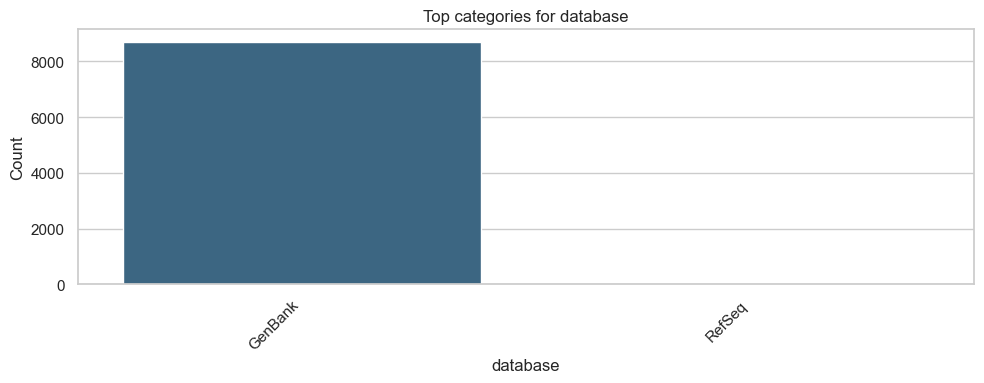

               strain  count
0             Missing   1121
1    Caribbean strain     20
2               Asian     17
3  CP11-Thailand-2010     16
4   CP1-Thailand-2010     16


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_3352/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


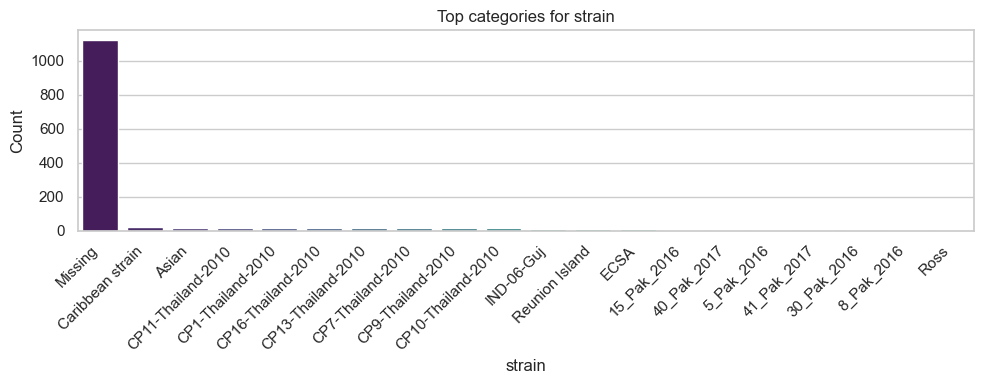

          region  count
0           Asia   4135
1  South America   2028
2        Missing   1162
3         Africa    623
4  North America    590


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_3352/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


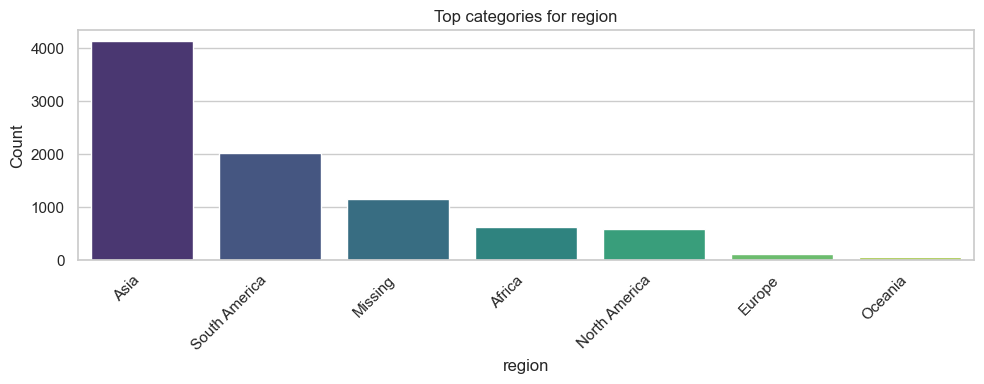

/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_3352/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


    location  count
0      India   1290
1    Missing   1148
2   Thailand    695
3  Singapore    429
4     Brazil    300


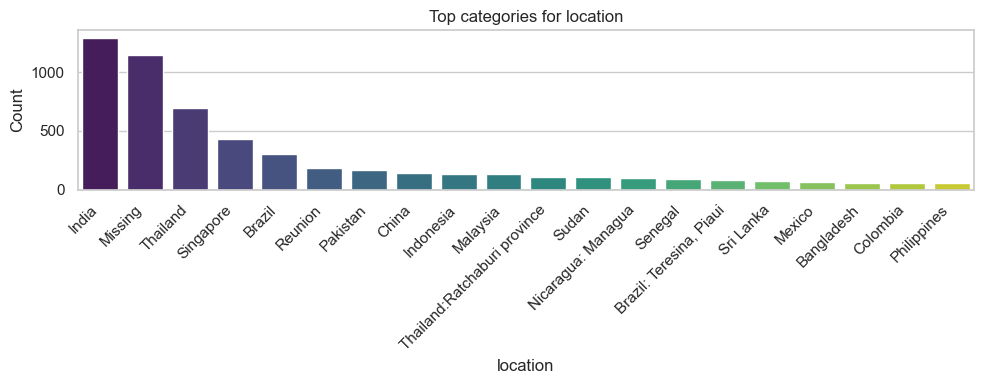

  collected  count
0   Missing   1579
1      2010    335
2      2009    178
3      2014    171
4      2016    147


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_3352/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


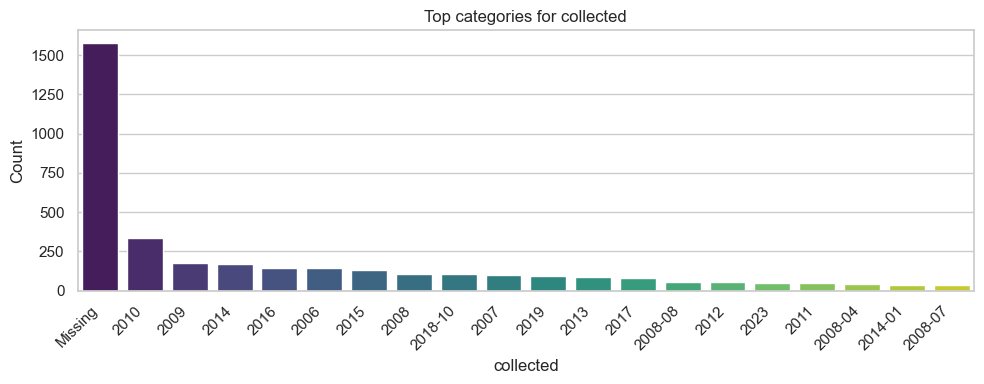

              submitted  count
0  2023-06-30T00:00:00Z    425
1  2020-12-31T00:00:00Z    393
2  2020-11-01T00:00:00Z    326
3  2017-04-01T00:00:00Z    193
4  2025-06-10T00:00:00Z    184


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_3352/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


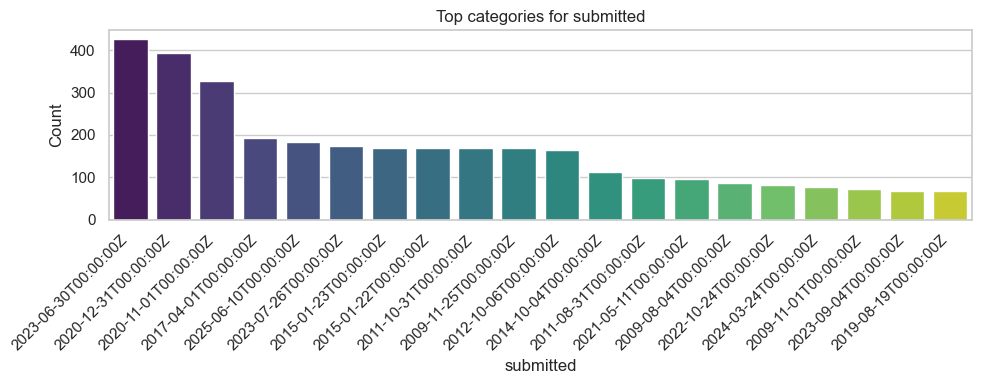

                updated  count
0  2016-07-25T00:00:00Z    426
1  2023-06-30T00:00:00Z    425
2  2020-12-31T00:00:00Z    393
3  2016-07-24T00:00:00Z    352
4  2020-11-01T00:00:00Z    326


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_3352/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


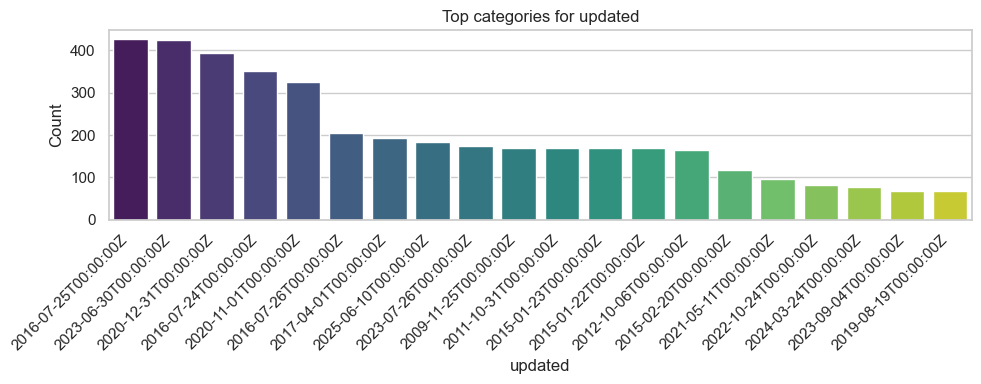

               host  count
0      Homo sapiens   6826
1           Missing   1494
2     Aedes aegypti    152
3         Culicidae     88
4  Aedes albopictus     39


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_3352/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


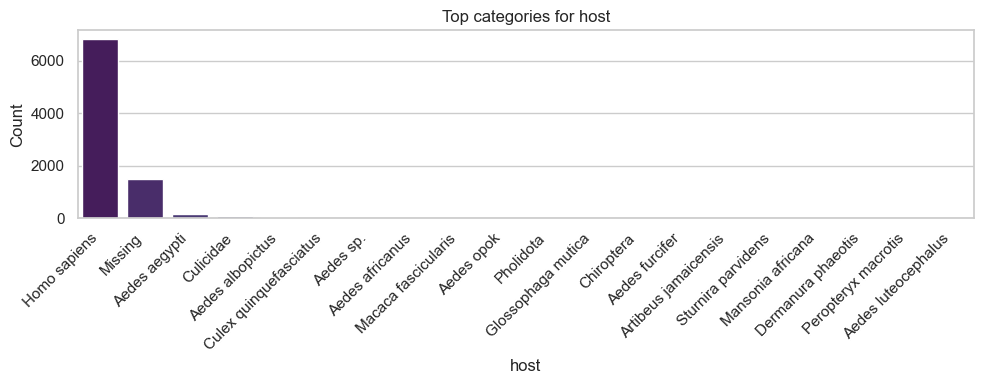

      isolation_source  count
0              Missing   5176
1                blood   3367
2       pooled insects     69
3               tissue     60
4  cerebrospinal fluid     12


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_3352/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


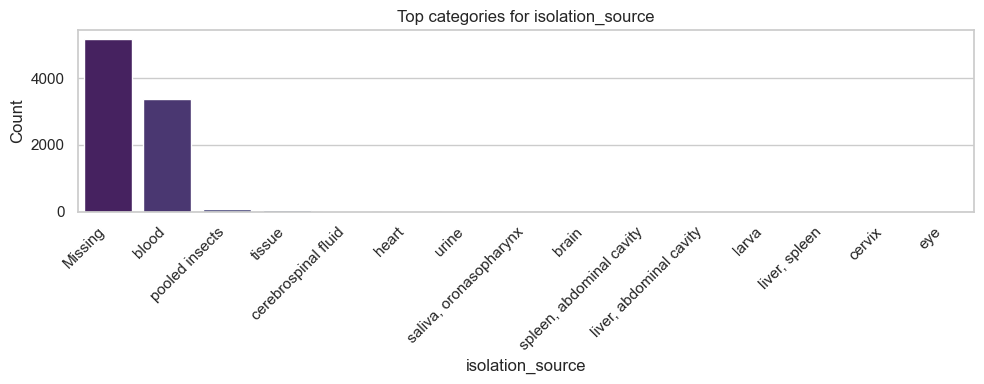

  bioproject_accession  count
0              Missing   8406
1          PRJNA294670    205
2           PRJEB23510     26
3         PRJNA1273433     23
4          PRJNA508296     20


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_3352/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


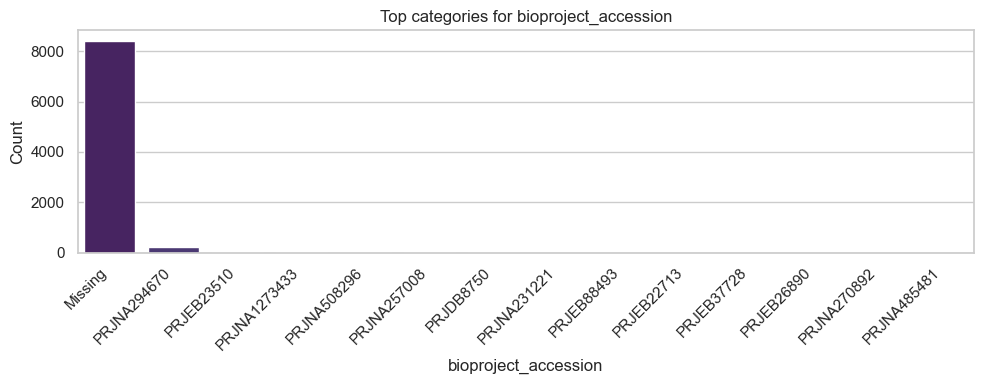

  biosample_accession  count
0             Missing   8664
1        SAMN48945982      2
2        SAMN48945984      2
3        SAMN48945977      2
4        SAMN48945975      2


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_3352/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


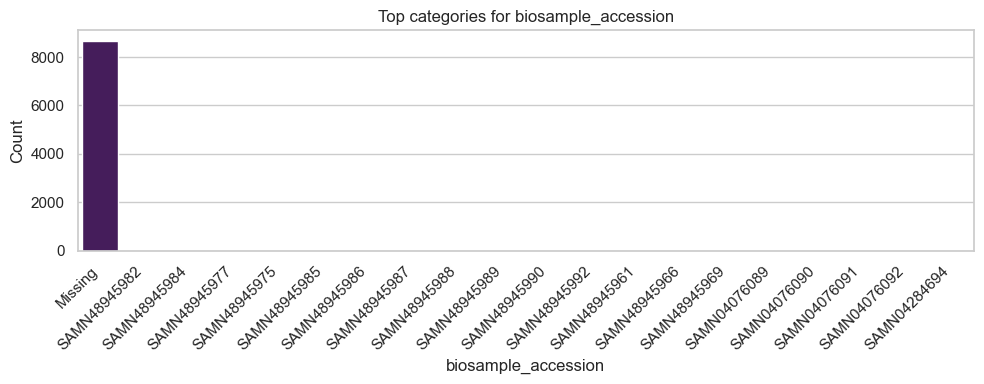

  sra_accession  count
0       Missing   8664
1   SRR33875775      2
2   SRR33875773      2
3   SRR33875781      2
4   SRR33875783      2


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_3352/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


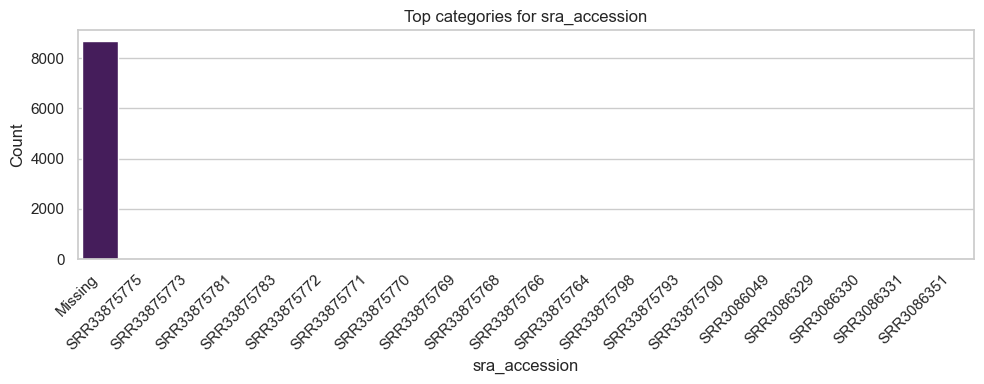

                                             authors  count
0  Xavier,J.,Fonseca,V.,Oliveira,C.,Lima,M.,Frits...    425
1  Chansaenroj,J.,Khongwichit,S.,Thongmee,T.,Benj...    356
2                               CARRICK,J.,LINNEN,J.    338
3  Hapuarachchi,H.C.,Wong,W.Y.,Koo,C.,Tien,W.P.,L...    326
4     Singh,P.,Sharma,P.,Rizvi,M.A.,Mittal,V.,Rai,A.    228


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_3352/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")
/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_3352/4278887848.py:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


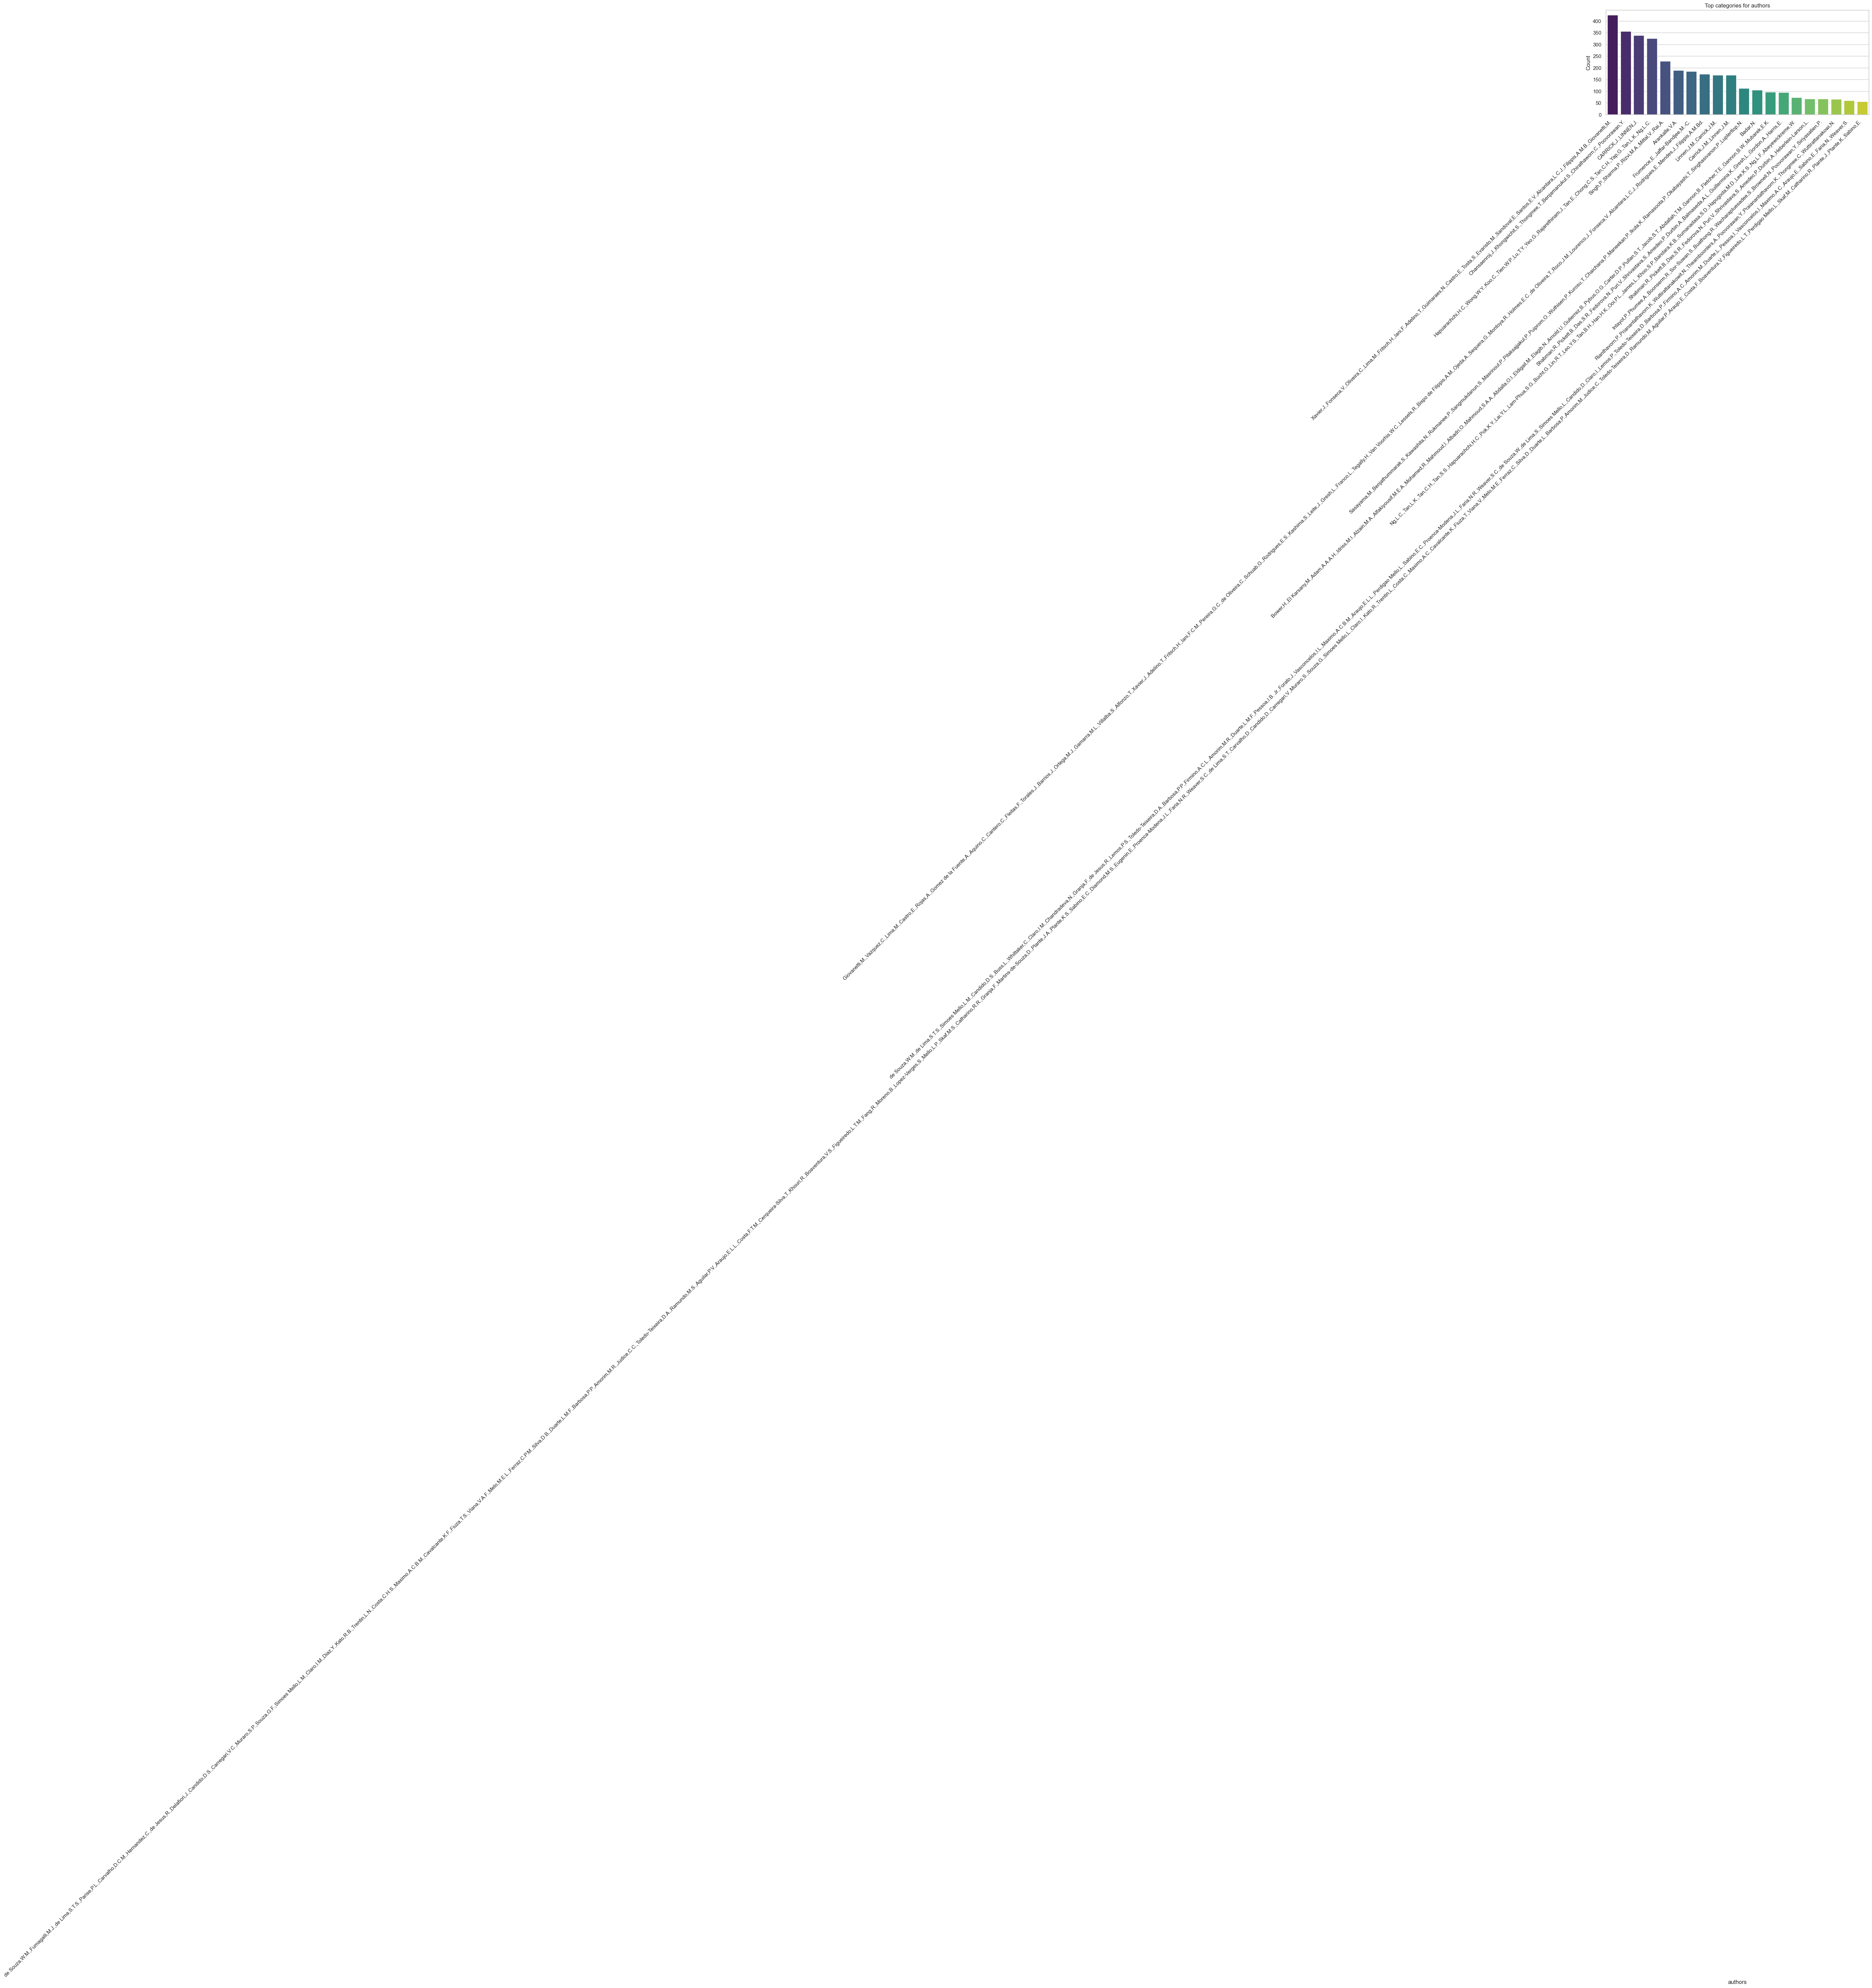

                                         institution  count
0                                            Missing   1024
1  Pan American Health Organization (PAHO), PHE-B...    703
2  National Environment Agency, Environmental Hea...    418
3  Faculty of Medical, Chulalongkorn University, ...    356
4  National Centre for Disease Control, Biochemis...    228


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_3352/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")
/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_3352/4278887848.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


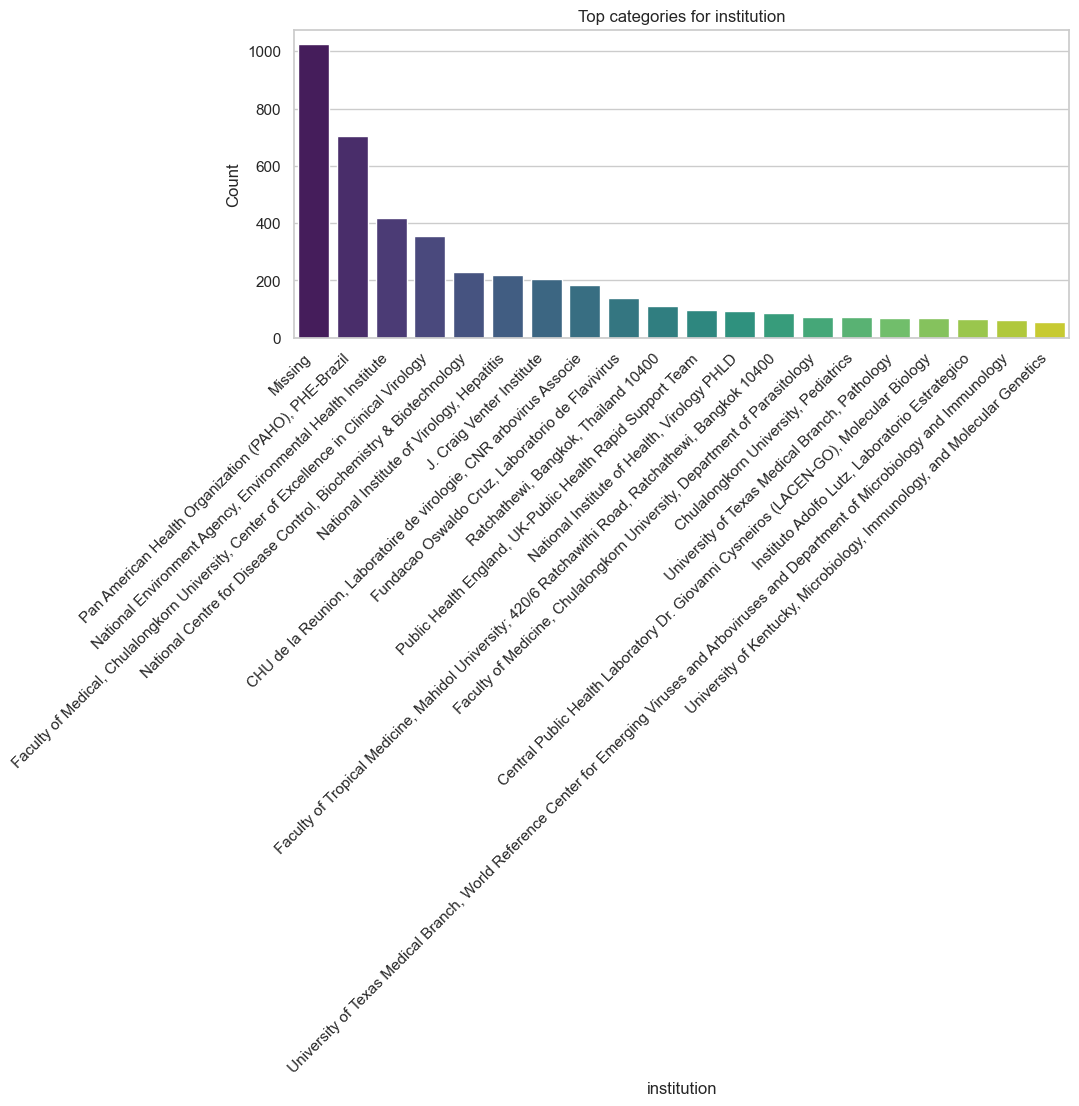

                                            sequence  count
0  ATAGAGCAGGAAATTGATCCCGACTCAACCATCCTGGATATCGGCA...    154
1  TACGAACACGCAACAGTGATCCCGAACACGGTGGGAGTACCGTATA...    145
2  TACGAACACGTAACAGTGATCCCGAACACGGTGGGAGTACCGTATA...     68
3  TACCCATTCATGTGGGGCGGCGCCTACTGCTTCTGCGACGCTGAAA...     65
4  TACGAACACGTAACAGTGATCCCGAACACGGTGGGAGTACCGTATA...     56


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_3352/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")
/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_3352/4278887848.py:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


RuntimeError: Could not convert glyph to bitmap (raster overflow; error code 0x62)

<Figure size 1000x400 with 1 Axes>

In [25]:
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
print(categorical_cols)
if categorical_cols:
    for col in categorical_cols:
        n_unique = df[col].nunique(dropna=False)
        n_total = len(df[col])

        # Skip if every value is unique
        if n_unique == n_total:
            print(f"Skipping {col} (all values unique)")
            continue
        
        value_counts = (
            df[col]
            .fillna("Missing")
            .value_counts()
            .head(20)
            .reset_index()
        )
        value_counts.columns = [col, "count"]
        print(value_counts.head())
        plt.figure(figsize=(10, 4))
        sns.barplot(data=value_counts, x=col, y="count", palette="viridis")
        plt.title(f"Top categories for {col}")
        plt.ylabel("Count")
        plt.xlabel(col)
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()
else:
    print("No categorical columns found.")


## EDA of curated data

In [62]:
filepath = "../data/full_data/metadata_raw.tsv"
df = pd.read_csv(filepath, sep="\t")

In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4673 entries, 0 to 4672
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   accession              4673 non-null   object 
 1   genbank_accession_rev  4673 non-null   object 
 2   strain                 4673 non-null   object 
 3   date                   4673 non-null   object 
 4   region                 4662 non-null   object 
 5   country                4662 non-null   object 
 6   division               2403 non-null   object 
 7   location               1204 non-null   object 
 8   host                   4536 non-null   object 
 9   date_submitted         4673 non-null   object 
 10  sra_accession          47 non-null     object 
 11  abbr_authors           4673 non-null   object 
 12  authors                4673 non-null   object 
 13  institution            4673 non-null   object 
 14  clade                  4673 non-null   object 
 15  qc.o

In [28]:
df.head()

accession genbank_accession_rev                                 strain  \
0  KY680383            KY680383.1  CHIKV/Homo sapiens/USA/CKVHL_121/2014   
1  KY680384            KY680384.1   CHIKV/Homo sapiens/USA/CKVHL_03/2014   
2  KY680385            KY680385.1   CHIKV/Homo sapiens/USA/CKVHL_70/2014   
3  KY680386            KY680386.1   CHIKV/Homo sapiens/USA/CKVHL_16/2014   
4  KY680387            KY680387.1   CHIKV/Homo sapiens/USA/CKVHL_18/2014   

         date         region country           division location  \
0  2014-08-20  North America     USA  Palm Beach County      NaN   
1  2014-06-25  North America     USA      Orange County      NaN   
2  2014-11-25  North America     USA        Polk County      NaN   
3  2014-09-24  North America     USA     Broward County      NaN   
4  2014-10-14  North America     USA     Osceola County      NaN   

           host date_submitted  ...  \
0  Homo sapiens     2017-04-01  ...   
1  Homo sapiens     2017-04-01  ...   
2  Homo sapiens     2017-04-01  ...   
3  Homo sapiens     2017-04-01  ...   
4  Homo sapiens     2017-04-01  ...   

                                    cdsCoverage_dict   6K    C   E1   E2   E3  \
0  {'6K': 1.0, 'C': 1.0, 'E1': 1.0, 'E2': 1.0, 'E...  1.0  1.0  1.0  1.0  1.0   
1  {'6K': 1.0, 'C': 1.0, 'E1': 1.0, 'E2': 1.0, 'E...  1.0  1.0  1.0  1.0  1.0   
2  {'6K': 1.0, 'C': 1.0, 'E1': 1.0, 'E2': 1.0, 'E...  1.0  1.0  1.0  1.0  1.0   
3  {'6K': 1.0, 'C': 1.0, 'E1': 1.0, 'E2': 1.0, 'E...  1.0  1.0  1.0  1.0  1.0   
4  {'6K': 1.0, 'C': 1.0, 'E1': 1.0, 'E2': 1.0, 'E...  1.0  1.0  1.0  1.0  1.0   

  nsP1  nsP2  nsP3  nsP4  
0  1.0   1.0   1.0   1.0  
1  1.0   1.0   1.0   1.0  
2  1.0   1.0   1.0   1.0  
3  1.0   1.0   1.0   1.0  
4  1.0   1.0   1.0   1.0  

[5 rows x 32 columns]

In [29]:
df.describe()

qc.overallScore  alignmentScore  alignmentStart  alignmentEnd  \
count      4673.000000     4673.000000     4673.000000   4673.000000   
mean          1.929269    22716.358870     3218.265782  11238.501391   
std          10.375203    13082.130231     4422.256870   1132.987303   
min           0.000000     1709.000000        1.000000   1680.000000   
25%           0.000000     4538.000000       52.000000  11302.000000   
50%           0.000000    31857.000000      135.000000  11313.000000   
75%           0.000000    32415.000000     8542.000000  11611.000000   
max          95.294785    35305.000000    11160.000000  11826.000000   

       genome_coverage           6K            C           E1           E2  \
count      4673.000000  3535.000000  3254.000000  4497.000000  3515.000000   
mean          0.674852     0.977156     0.990624     0.965318     0.979259   
std           0.388106     0.135894     0.053527     0.105160     0.106872   
min           0.056401     0.000000     0.007663     0.000000     0.002364   
25%           0.135718     1.000000     1.000000     0.990909     1.000000   
50%           0.940724     1.000000     1.000000     1.000000     1.000000   
75%           0.973279     1.000000     1.000000     1.000000     1.000000   
max           1.000000     1.000000     1.000000     1.000000     1.000000   

                E3         nsP1         nsP2         nsP3         nsP4  
count  3284.000000  3093.000000  3058.000000  3057.000000  3095.000000  
mean      0.988200     0.964412     0.992893     0.992368     0.986181  
std       0.073706     0.090337     0.046782     0.050986     0.081335  
min       0.000000     0.009346     0.006266     0.022642     0.001634  
25%       1.000000     0.962617     1.000000     1.000000     1.000000  
50%       1.000000     1.000000     1.000000     1.000000     1.000000  
75%       1.000000     1.000000     1.000000     1.000000     1.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000

In [30]:
df.describe(include='object')

accession genbank_accession_rev            strain        date region  \
count       4673                  4673              4673        4673   4662   
unique      4673                  4673              4433        1589      6   
top     KY680383            KY680383.1  Caribbean strain  2010-XX-XX   Asia   
freq           1                     1                20         177   1969   

       country division location          host date_submitted sra_accession  \
count     4662     2403     1204          4536           4673            47   
unique     102      415      141            16            364            44   
top     Brazil  Réunion    Bahia  Homo sapiens     2023-06-30   SRR33875775   
freq      1158      175      114          4392            425             2   

         abbr_authors                                            authors  \
count            4673                                               4673   
unique            270                                                399   
top     Xavier et al.  Xavier,J.,Fonseca,V.,Oliveira,C.,Lima,M.,Frits...   
freq              447                                                425   

                                              institution    clade  \
count                                                4673     4673   
unique                                                278        3   
top     Pan American Health Organization (PAHO), PHE-B...  II-ECSA   
freq                                                  699     3670   

       qc.overallStatus                                        cdsCoverage  \
count              4673                                               4673   
unique                2                                               1054   
top                good  6K:1,C:1,E1:1,E2:1,E3:1,nsP1:1,nsP2:1,nsP3:1,n...   
freq               4533                                               1509   

                                         cdsCoverage_dict  
count                                                4673  
unique                                               1054  
top     {'6K': 1.0, 'C': 1.0, 'E1': 1.0, 'E2': 1.0, 'E...  
freq                                                 1509

In [31]:
sns.set_theme(style="whitegrid")
plt.rcParams.update({"figure.figsize": (10, 6)})


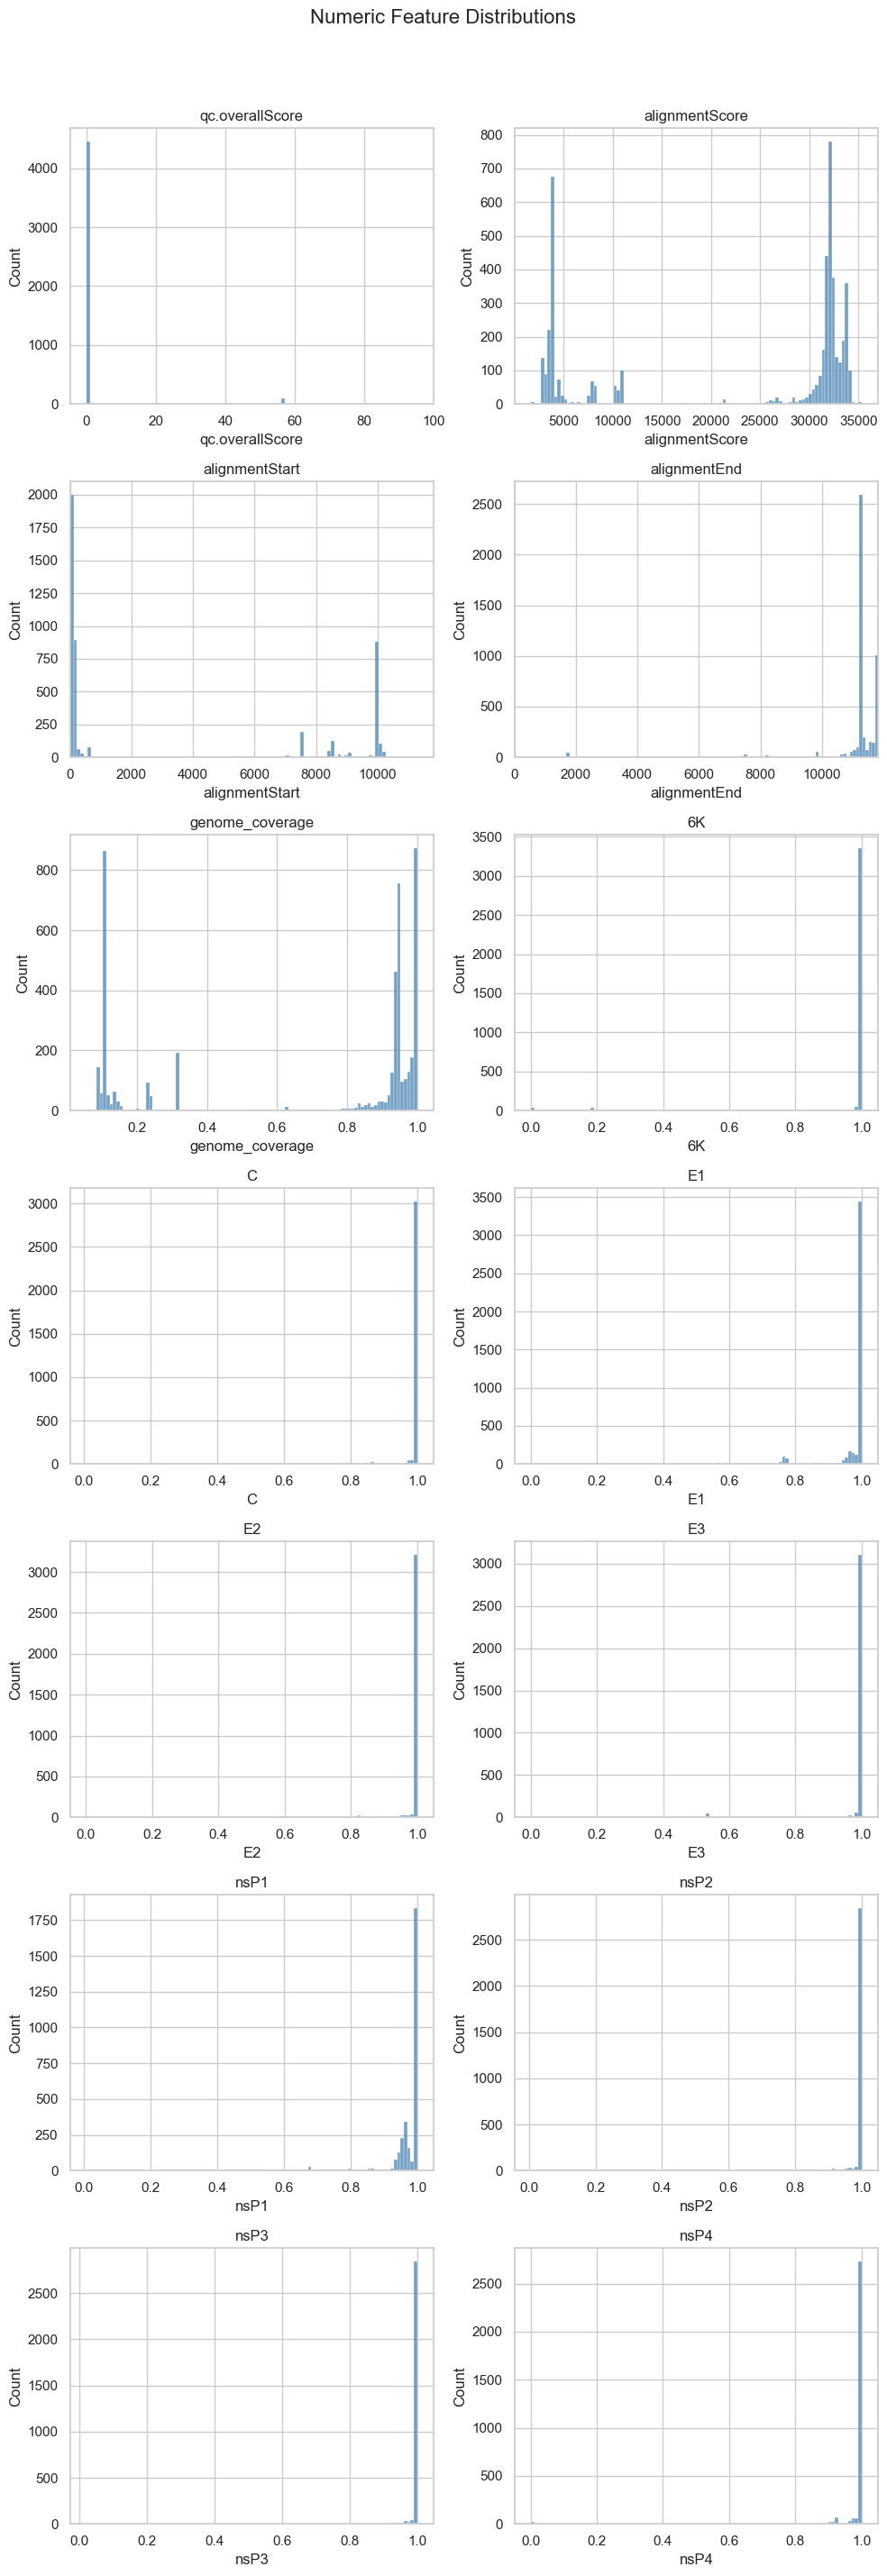

In [34]:
numeric_cols = df.select_dtypes(include="number").columns.tolist()
# numeric_cols.remove("subtypes")
x_axis = {"alignmentStart": (0, 11826), "alignmentEnd": (0, 11826)}
if numeric_cols:
    n_cols = min(2, len(numeric_cols))
    n_rows = math.ceil(len(numeric_cols) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)
    # Figure (class) = container for all plot elements
    # Axes (class) = one (sub-)plot in a figure
        # contains plotted data, axis ticks, labels, title, legend, etc.
    axes = axes.flatten()
    for ax, col in zip(axes, numeric_cols):
        """ if col in x_axis:
            lower, upper = x_axis[col]
        else:
            lower, upper = (df[col].min() - 0.05*df[col].max(), df[col].max()+0.05*df[col].max()) """
        sns.histplot(df[col].dropna(), ax=ax, kde=False, color="steelblue", bins = 100)
        ax.set_title(col)
        if col in x_axis:
            lower, upper = x_axis[col]
            ax.set_xlim(lower, upper)
    for ax in axes[len(numeric_cols):]:
        ax.set_visible(False)
    fig.suptitle("Numeric Feature Distributions", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns found.")


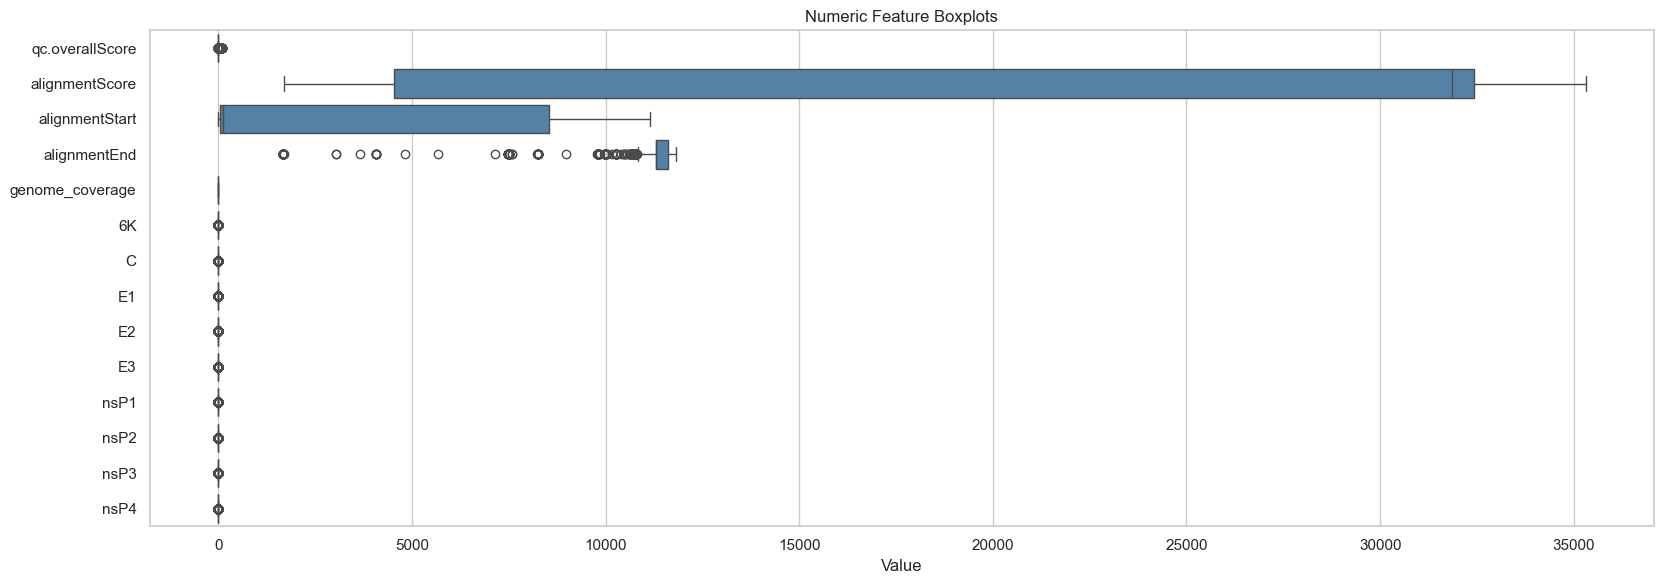

In [35]:
numeric_cols = df.select_dtypes(include="number").columns.tolist()
if numeric_cols:
    melted = df[numeric_cols].melt(var_name="variable", value_name="value")
    plt.figure(figsize=(max(6, len(numeric_cols) * 1.2), 6))
    sns.boxplot(data=melted, x="value", y="variable", orient="h", color="steelblue")
    plt.title("Numeric Feature Boxplots")
    plt.xlabel("Value")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns found.")


In [48]:
%%bash
seqkit stats ../ingest/data/sequences.fasta

seqkit stats ../../data/download_test/sequences_raw.fasta

seqkit stats ../data/full_data/sequences_raw.fasta
seqkit stats ../data/full_data/sequences.fasta

file                            format  type  num_seqs     sum_len  min_len  avg_len  max_len
../ingest/data/sequences.fasta  FASTA   DNA      8,713  42,936,579       16  4,927.9   15,987
file                                          format  type  num_seqs     sum_len  min_len  avg_len  max_len
../../data/download_test/sequences_raw.fasta  FASTA   DNA      8,713  42,936,579       16  4,927.9   15,987
file                                   format  type  num_seqs     sum_len  min_len  avg_len  max_len
../data/full_data/sequences_raw.fasta  FASTA   DNA      8,713  42,936,579       16  4,927.9   15,987
file                               format  type  num_seqs     sum_len  min_len  avg_len  max_len
../data/full_data/sequences.fasta  FASTA   DNA      4,673  37,513,571    1,003  8,027.7   15,987


In [50]:
%%bash
seqkit grep -v -p "NC_004162" ../data/full_data/sequences_raw.fasta \
| augur align \
            --sequences - \
            --reference-sequence ../config/chikv_reference.gb \
            --output full_alignment.fasta \
            --nthreads auto \
            --fill-gaps



using mafft to align via:
	mafft --reorder --anysymbol --nomemsave --adjustdirection --thread 8 full_alignment.fasta.to_align.fasta 1> full_alignment.fasta 2> full_alignment.fasta.log 

	Katoh et al, Nucleic Acid Research, vol 30, issue 14
	https://doi.org/10.1093%2Fnar%2Fgkf436

Sequence "HC083793" was reverse-complemented by the alignment program.
Sequence "HV507524" was reverse-complemented by the alignment program.
Sequence "JC986674" was reverse-complemented by the alignment program.
Sequence "JC991269" was reverse-complemented by the alignment program.
Sequence "HC083797" was reverse-complemented by the alignment program.
Sequence "HV507528" was reverse-complemented by the alignment program.
Sequence "JC986678" was reverse-complemented by the alignment program.
Sequence "JC991273" was reverse-complemented by the alignment program.
Sequence "HC083857" was reverse-complemented by the alignment program.
Sequence "HV507588" was reverse-complemented by the alignment program.
Sequence

In [51]:
alignment = AlignIO.read("full_alignment.fasta", "fasta")
print(alignment)

Alignment with 8713 rows and 11826 columns
ATGGCTGCGTGAGACACACGTAGCCTACCAGTTTCTTACTGCTC...TTC NC_004162.2
ATGGCTGCGTGAGACACACGTAGCCTACCAGTTTCTTACTGCTC...TTC LY683325
ATGGCTGCGTGAGACACACGTAGCCTACCAGTTTCTTACTGCTC...TTC PA262880
ATGGCTGCGTGAGACACACGTAGCCTACCAGTTTCTTACTGCTC...TTC AF369024
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...TTC AF339485
ATGGCTGCGTGAGACACACGTAGCCTACCAGTTTCTTACTGCTC...TTC AF490259
NNNNNNNCGTGAGACACACGTAGCCTACCAGTTTCTTACTGCTC...TTC MG280943
NNNNNNNNNTGAGACACACGTAGCCTACCAGTTTCTTACTGCTC...NNN ON009843
NNNNNNNCGTGAGACACACGTAGCCTACCAGTTTCTTACTGCTC...NNN KX262990
NNNNNNNNGTGAGACACACGTAGCCTACCAGTTTCTTACTGCTC...NNN OR283254
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...NNN OR344786
NNNNNNNNNNGAGACACACGTAGCCTACCAGTTTCTTACTGCTC...NNN KJ679577
NNNNNNNNNNNNNNNNNACGTAGCCTACCAGTTTCTTACTGCTC...NNN HM045821
NNNNNNNCGTGAGACACACGTAGCCTACCAGTTTCTTACTGCTC...NNN PQ673601
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...NNN OQ320495
ATGGCTGCGTGAGACACACGTAGCCTACCAGTTTCTTACTGCTC...TTC MW5

In [52]:
length = alignment.get_alignment_length()
nr_seq = len(alignment)

arr = np.array([list(str(rec.seq).upper()) for rec in alignment])
missing = np.isin(arr, ["-", "N", "?"])
not_missing = ~missing

count = not_missing.sum(axis=0)
frac = count/nr_seq

coverage_df = pd.DataFrame({"pos": np.arange(1, length+1), "coverage": frac})

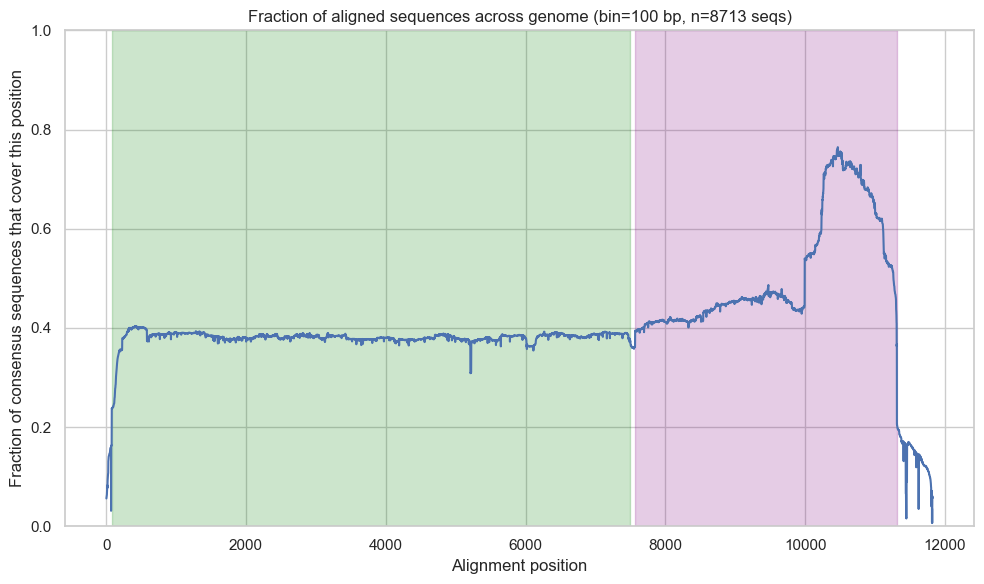

In [ ]:
plt.plot(coverage_df["pos"], coverage_df["coverage"])
plt.axvspan(77, 7501, color="green", alpha=0.2)
plt.axvspan(7567, 11313, color="purple", alpha=0.2)
plt.ylim(0, 1)
plt.xlabel("Alignment position")
plt.ylabel("Fraction of consensus sequences that cover this position")
plt.title(f"Fraction of aligned sequences across genome (bin=100 bp, n={nr_seq} seqs)")
plt.tight_layout()
plt.savefig("../../report/figures/genome_coverage.pdf", format="pdf")
plt.show()

In [64]:
region_palette = {
    "Africa": "#1f77b4",       # blue
    "Asia": "#ff7f0e",         # orange
    "Europe": "#2ca02c",       # green
    "North America": "#d62728",# red
    "Oceania": "#9467bd",      # purple
    "South America": "#8c564b" # brown
}


Text(0.5, 1.0, 'Samples per year by region')

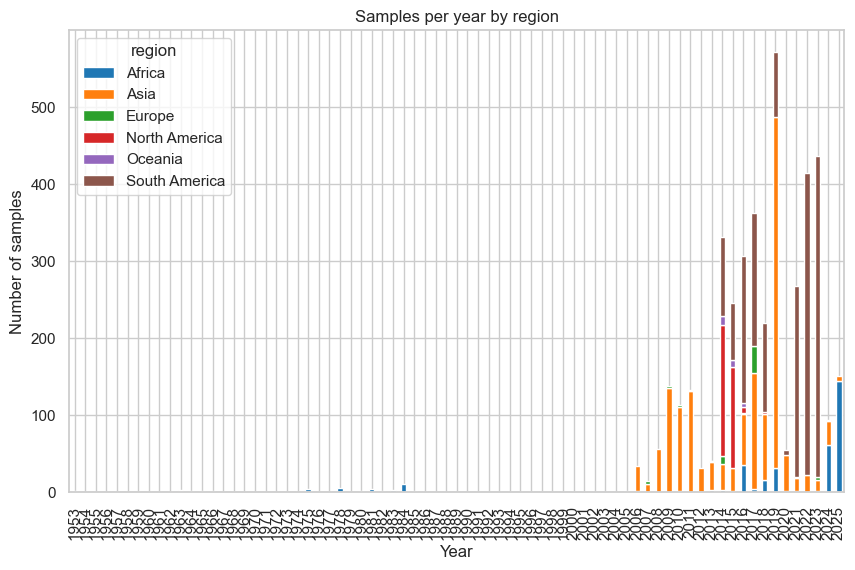

In [65]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["year"] = df.date.dt.year
counts = (df.groupby(["year", "region"])
          .size()
          .unstack(fill_value=0)
          .sort_index()
)

all_years = pd.RangeIndex(counts.index.min(), counts.index.max() + 1)
counts = counts.reindex(all_years, fill_value=0)

ax = counts.plot(kind="bar", stacked=True, color=region_palette)
ax.set_xlabel("Year")
ax.set_ylabel("Number of samples")
ax.set_title("Samples per year by region")

region  Africa  Asia  Europe  North America  Oceania  South America
year                                                               
2005         2     0       0              0        0              0
2006         2    32       0              0        0              0
2007         0    11       4              0        0              0
2008         0    56       0              0        0              0
2009         0   135       3              0        0              0
2010         1   110       2              0        0              0
2011         0   131       0              0        2              0
2012         0    31       0              0        0              0
2013         3    36       1              1        0              0
2014         3    34      10            170       12            102
2015         1    31       0            130       10             73
2016        36    66       1              7        6            191
2017         4   151      35              0     

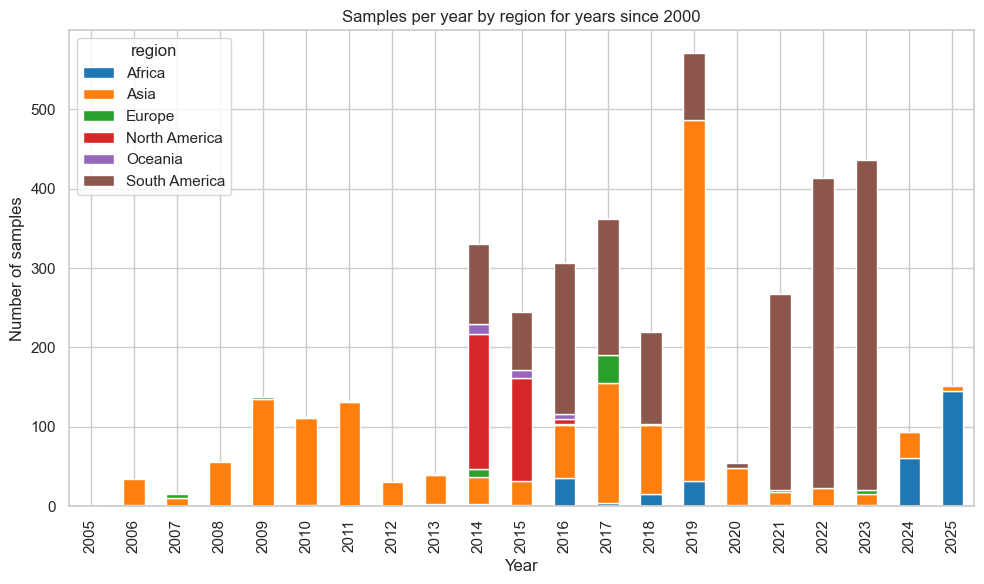

In [71]:
# keep only rows with year >= 2000
df_recent = df[df["year"] >= 2000]

# regroup and pivot
counts_recent = (
    df_recent.groupby(["year", "region"])
             .size()
             .unstack(fill_value=0)
             .sort_index()
)

counts_recent.index = counts_recent.index.astype(int)
print(counts_recent)
# plot again
ax = counts_recent.plot(kind="bar", stacked=True, color=region_palette)
ax.set_xlabel("Year")
ax.set_ylabel("Number of samples")
ax.set_title("Samples per year by region for years since 2000")
plt.tight_layout()
plt.savefig("../../report/figures/samples_per_year.pdf", format="pdf")
plt.show()


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_3352/612200555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent["length"] = df_recent["alignmentEnd"] - df_recent["alignmentStart"] + 1


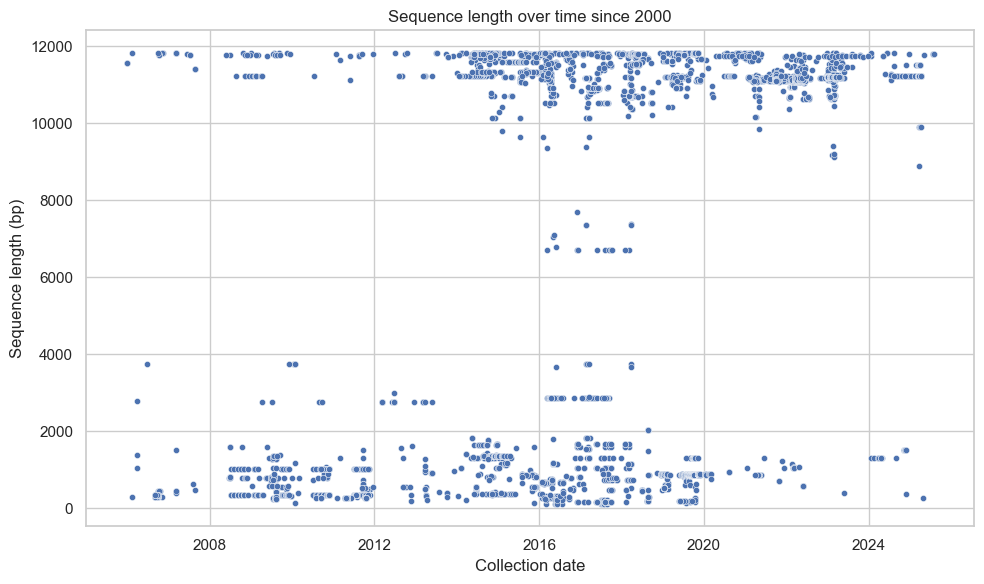

In [72]:
df_recent["length"] = df_recent["alignmentEnd"] - df_recent["alignmentStart"] + 1

plt.figure()
# sns.scatterplot(
#     data=df_recent, x="date", y="length", hue="region", palette=region_palette, s=20
# )

sns.scatterplot(
     data=df_recent, x="date", y="length", s=20
)
plt.xlabel("Collection date")
plt.ylabel("Sequence length (bp)")
plt.title("Sequence length over time since 2000")
plt.tight_layout()
plt.savefig("../../report/figures/sequence_lengths.pdf", format="pdf")
plt.show()

<Axes: xlabel='length', ylabel='Count'>

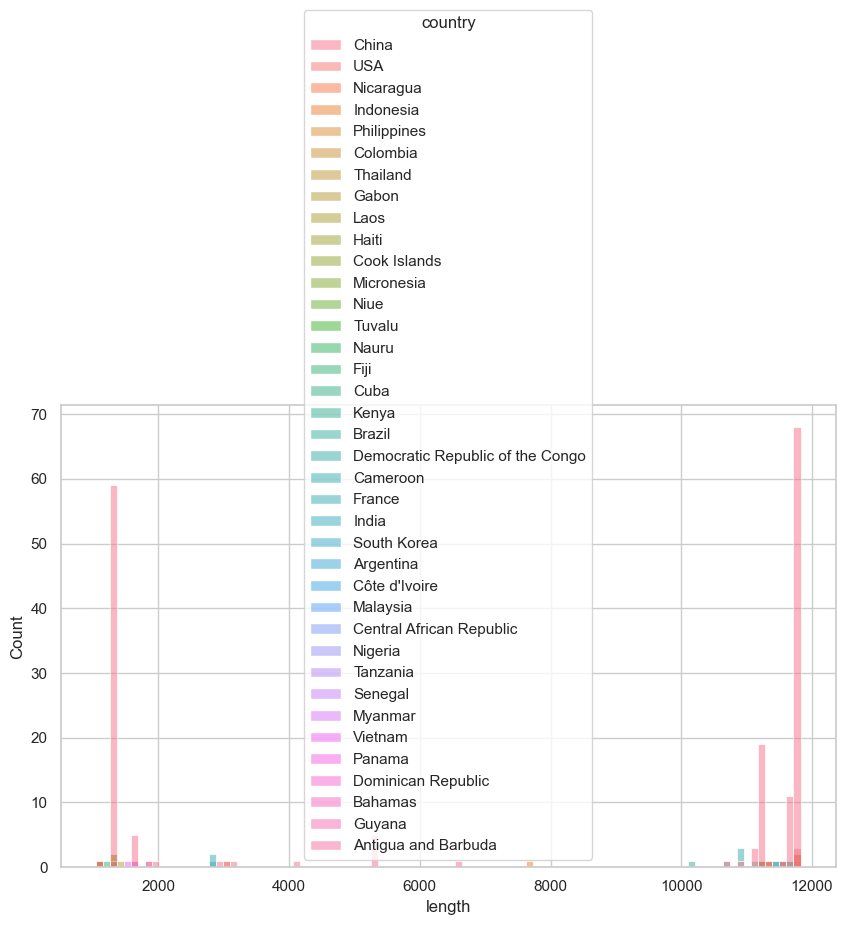

In [ ]:
china = pd.read_table("../data/ingest/subsampled_data/country_w_background/China/metadata.tsv")
china["length"] = china.alignmentEnd - china.alignmentStart
#china = china[china["length"] < 2000]
sns.histplot(china, x="length", hue="country", bins = 100)

<Axes: xlabel='length', ylabel='Count'>

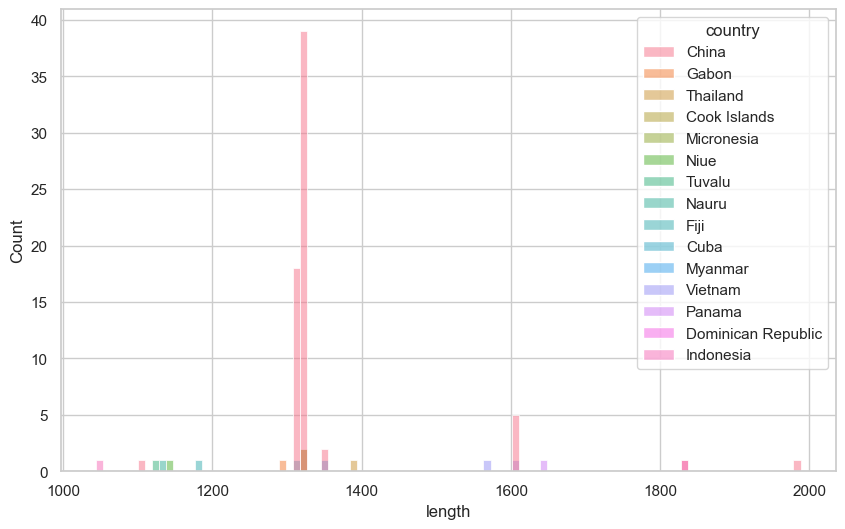

In [ ]:
china = pd.read_table("../data/ingest/subsampled_data/country_w_background/China/metadata.tsv")
china["length"] = china.alignmentEnd - china.alignmentStart
china = china[china["length"] < 2000]
sns.histplot(china, x="length", hue="country", bins = 100)

<Axes: xlabel='length', ylabel='Count'>

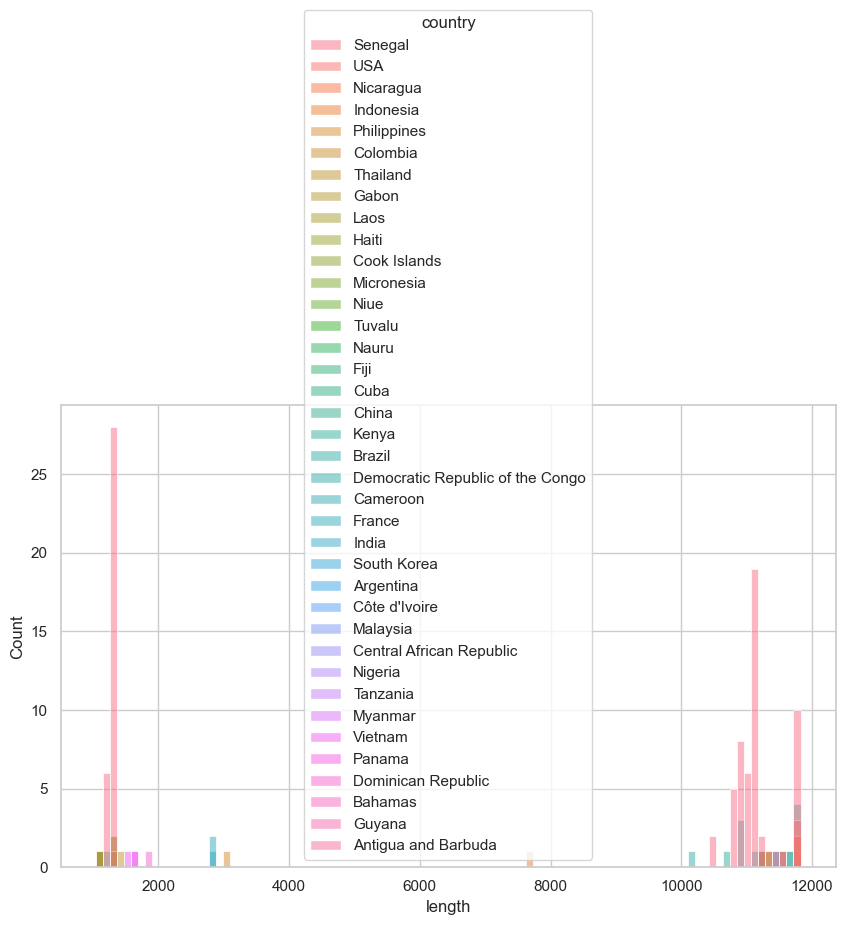

In [ ]:
senegal = pd.read_table("../data/ingest/subsampled_data/country_w_background/Senegal/metadata.tsv")
senegal["length"] = senegal.alignmentEnd - senegal.alignmentStart
#senegal = senegal[senegal["length"] < 2000]
sns.histplot(senegal, x="length", hue="country", bins = 100)

['accession', 'genbank_accession_rev', 'strain', 'date', 'region', 'country', 'division', 'location', 'host', 'date_submitted', 'sra_accession', 'abbr_authors', 'authors', 'institution', 'clade', 'qc.overallStatus']
Skipping accession (all values unique)
Skipping genbank_accession_rev (all values unique)
               strain  count
0    Caribbean strain     20
1               Asian     17
2   CP9-Thailand-2010     16
3  CP16-Thailand-2010     16
4  CP13-Thailand-2010     16


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


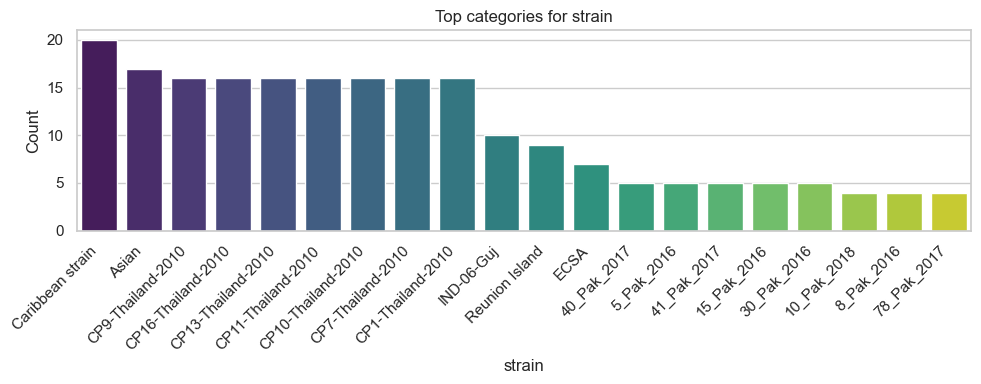

         date  count
0  XXXX-XX-XX   1579
1  2010-XX-XX    335
2  2009-XX-XX    178
3  2014-XX-XX    171
4  2016-XX-XX    147


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


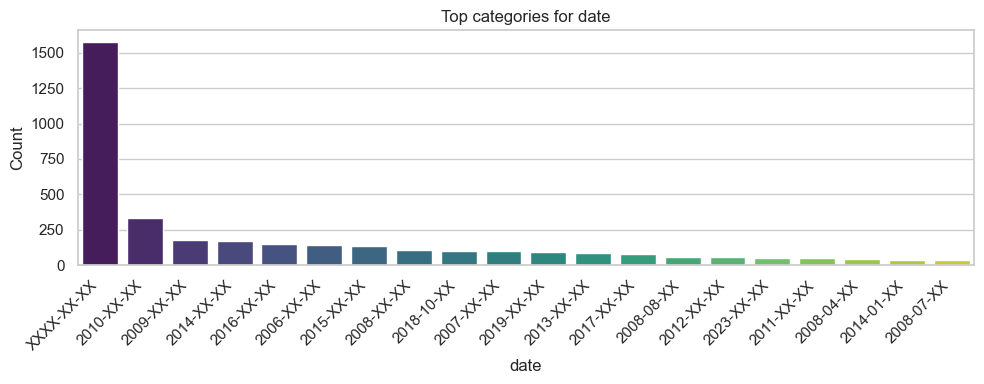

          region  count
0           Asia   4135
1  South America   2070
2        Missing   1143
3  North America    538
4         Africa    424


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


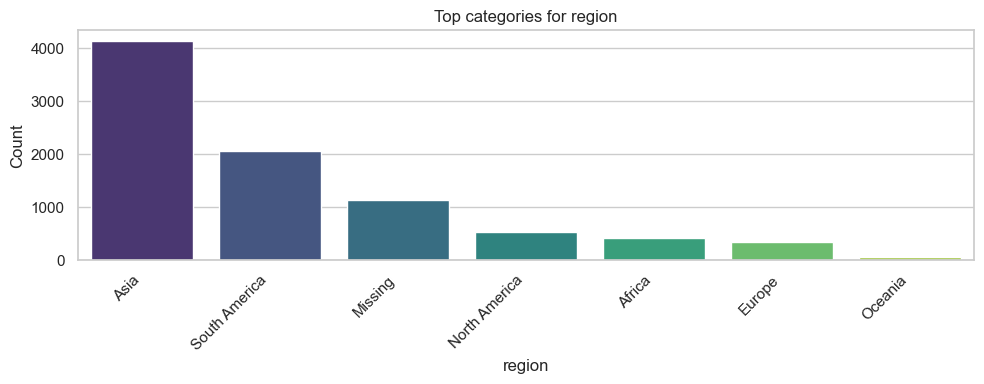

     country  count
0      India   1569
1     Brazil   1537
2    Missing   1143
3   Thailand    878
4  Singapore    429


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


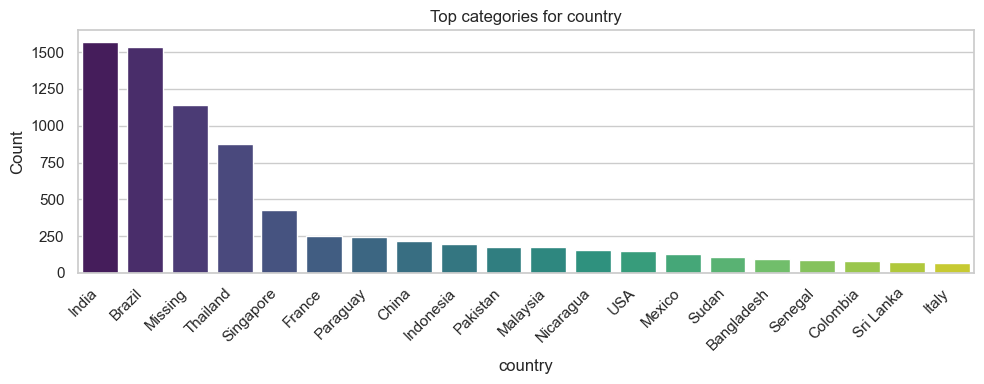

              division  count
0              Missing   5651
1              Réunion    185
2  Ratchaburi Province    112
3              Managua     97
4             Teresina     83


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


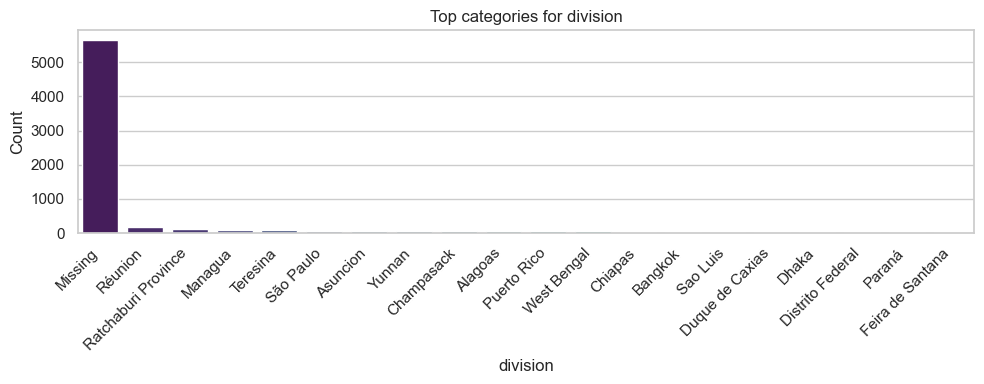

              location  count
0              Missing   7230
1                Bahia    124
2              Central    101
3                Piaui     89
4  Rio Grande do Norte     53


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


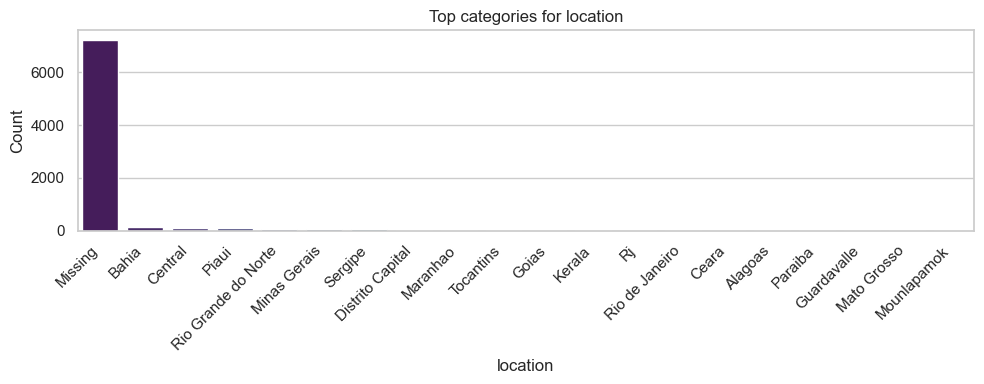

               host  count
0      Homo sapiens   6826
1           Missing   1494
2     Aedes aegypti    152
3         Culicidae     83
4  Aedes albopictus     39


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


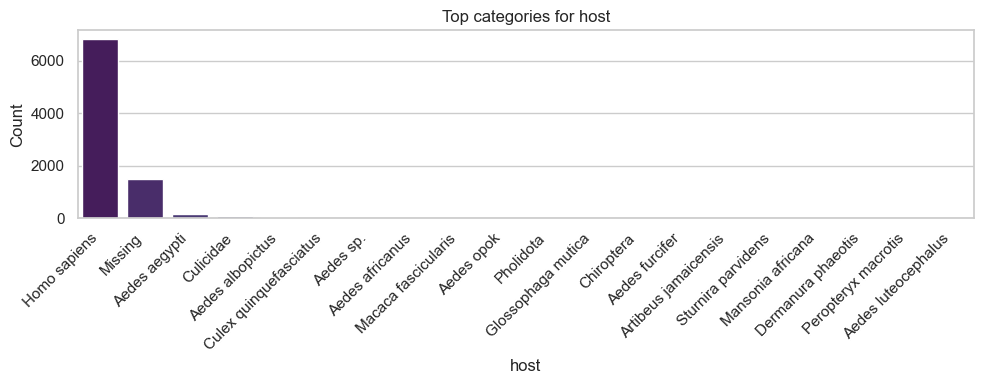

  date_submitted  count
0     2023-06-30    425
1     2020-12-31    393
2     2020-11-01    326
3     2017-04-01    193
4     2025-06-10    184


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


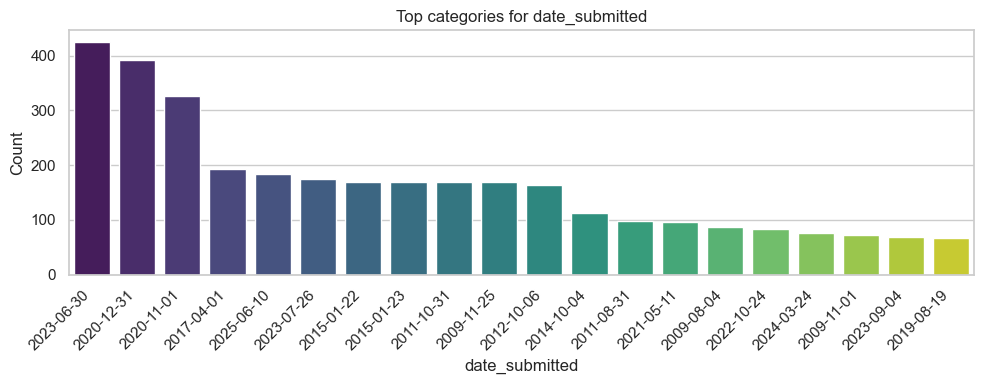

  sra_accession  count
0       Missing   8659
1   SRR33875775      2
2   SRR33875773      2
3   SRR33875781      2
4   SRR33875783      2


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


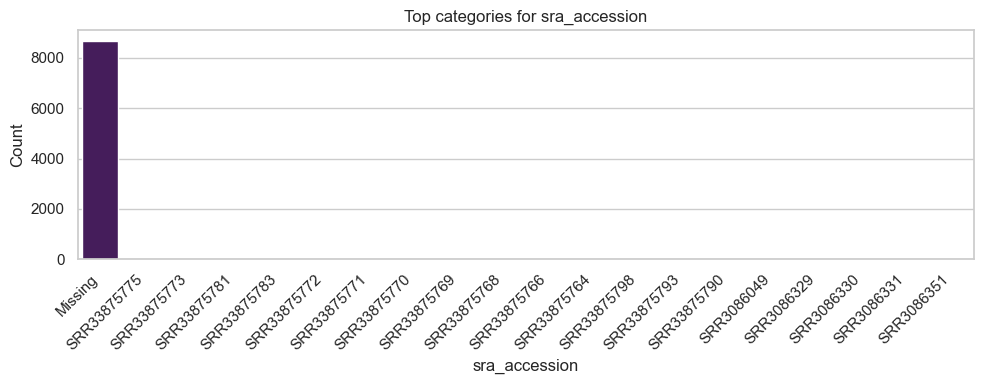

          abbr_authors  count
0        Xavier et al.    456
1  Hapuarachchi et al.    382
2   Chansaenroj et al.    371
3         Singh et al.    366
4       CARRICK et al.    338


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


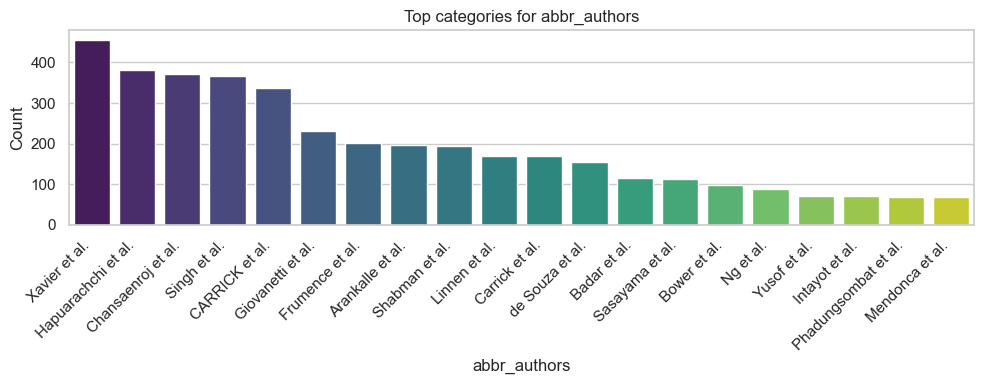

                                             authors  count
0  Xavier,J.,Fonseca,V.,Oliveira,C.,Lima,M.,Frits...    425
1  Chansaenroj,J.,Khongwichit,S.,Thongmee,T.,Benj...    356
2                               CARRICK,J.,LINNEN,J.    338
3  Hapuarachchi,H.C.,Wong,W.Y.,Koo,C.,Tien,W.P.,L...    326
4     Singh,P.,Sharma,P.,Rizvi,M.A.,Mittal,V.,Rai,A.    228


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")
/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/4278887848.py:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


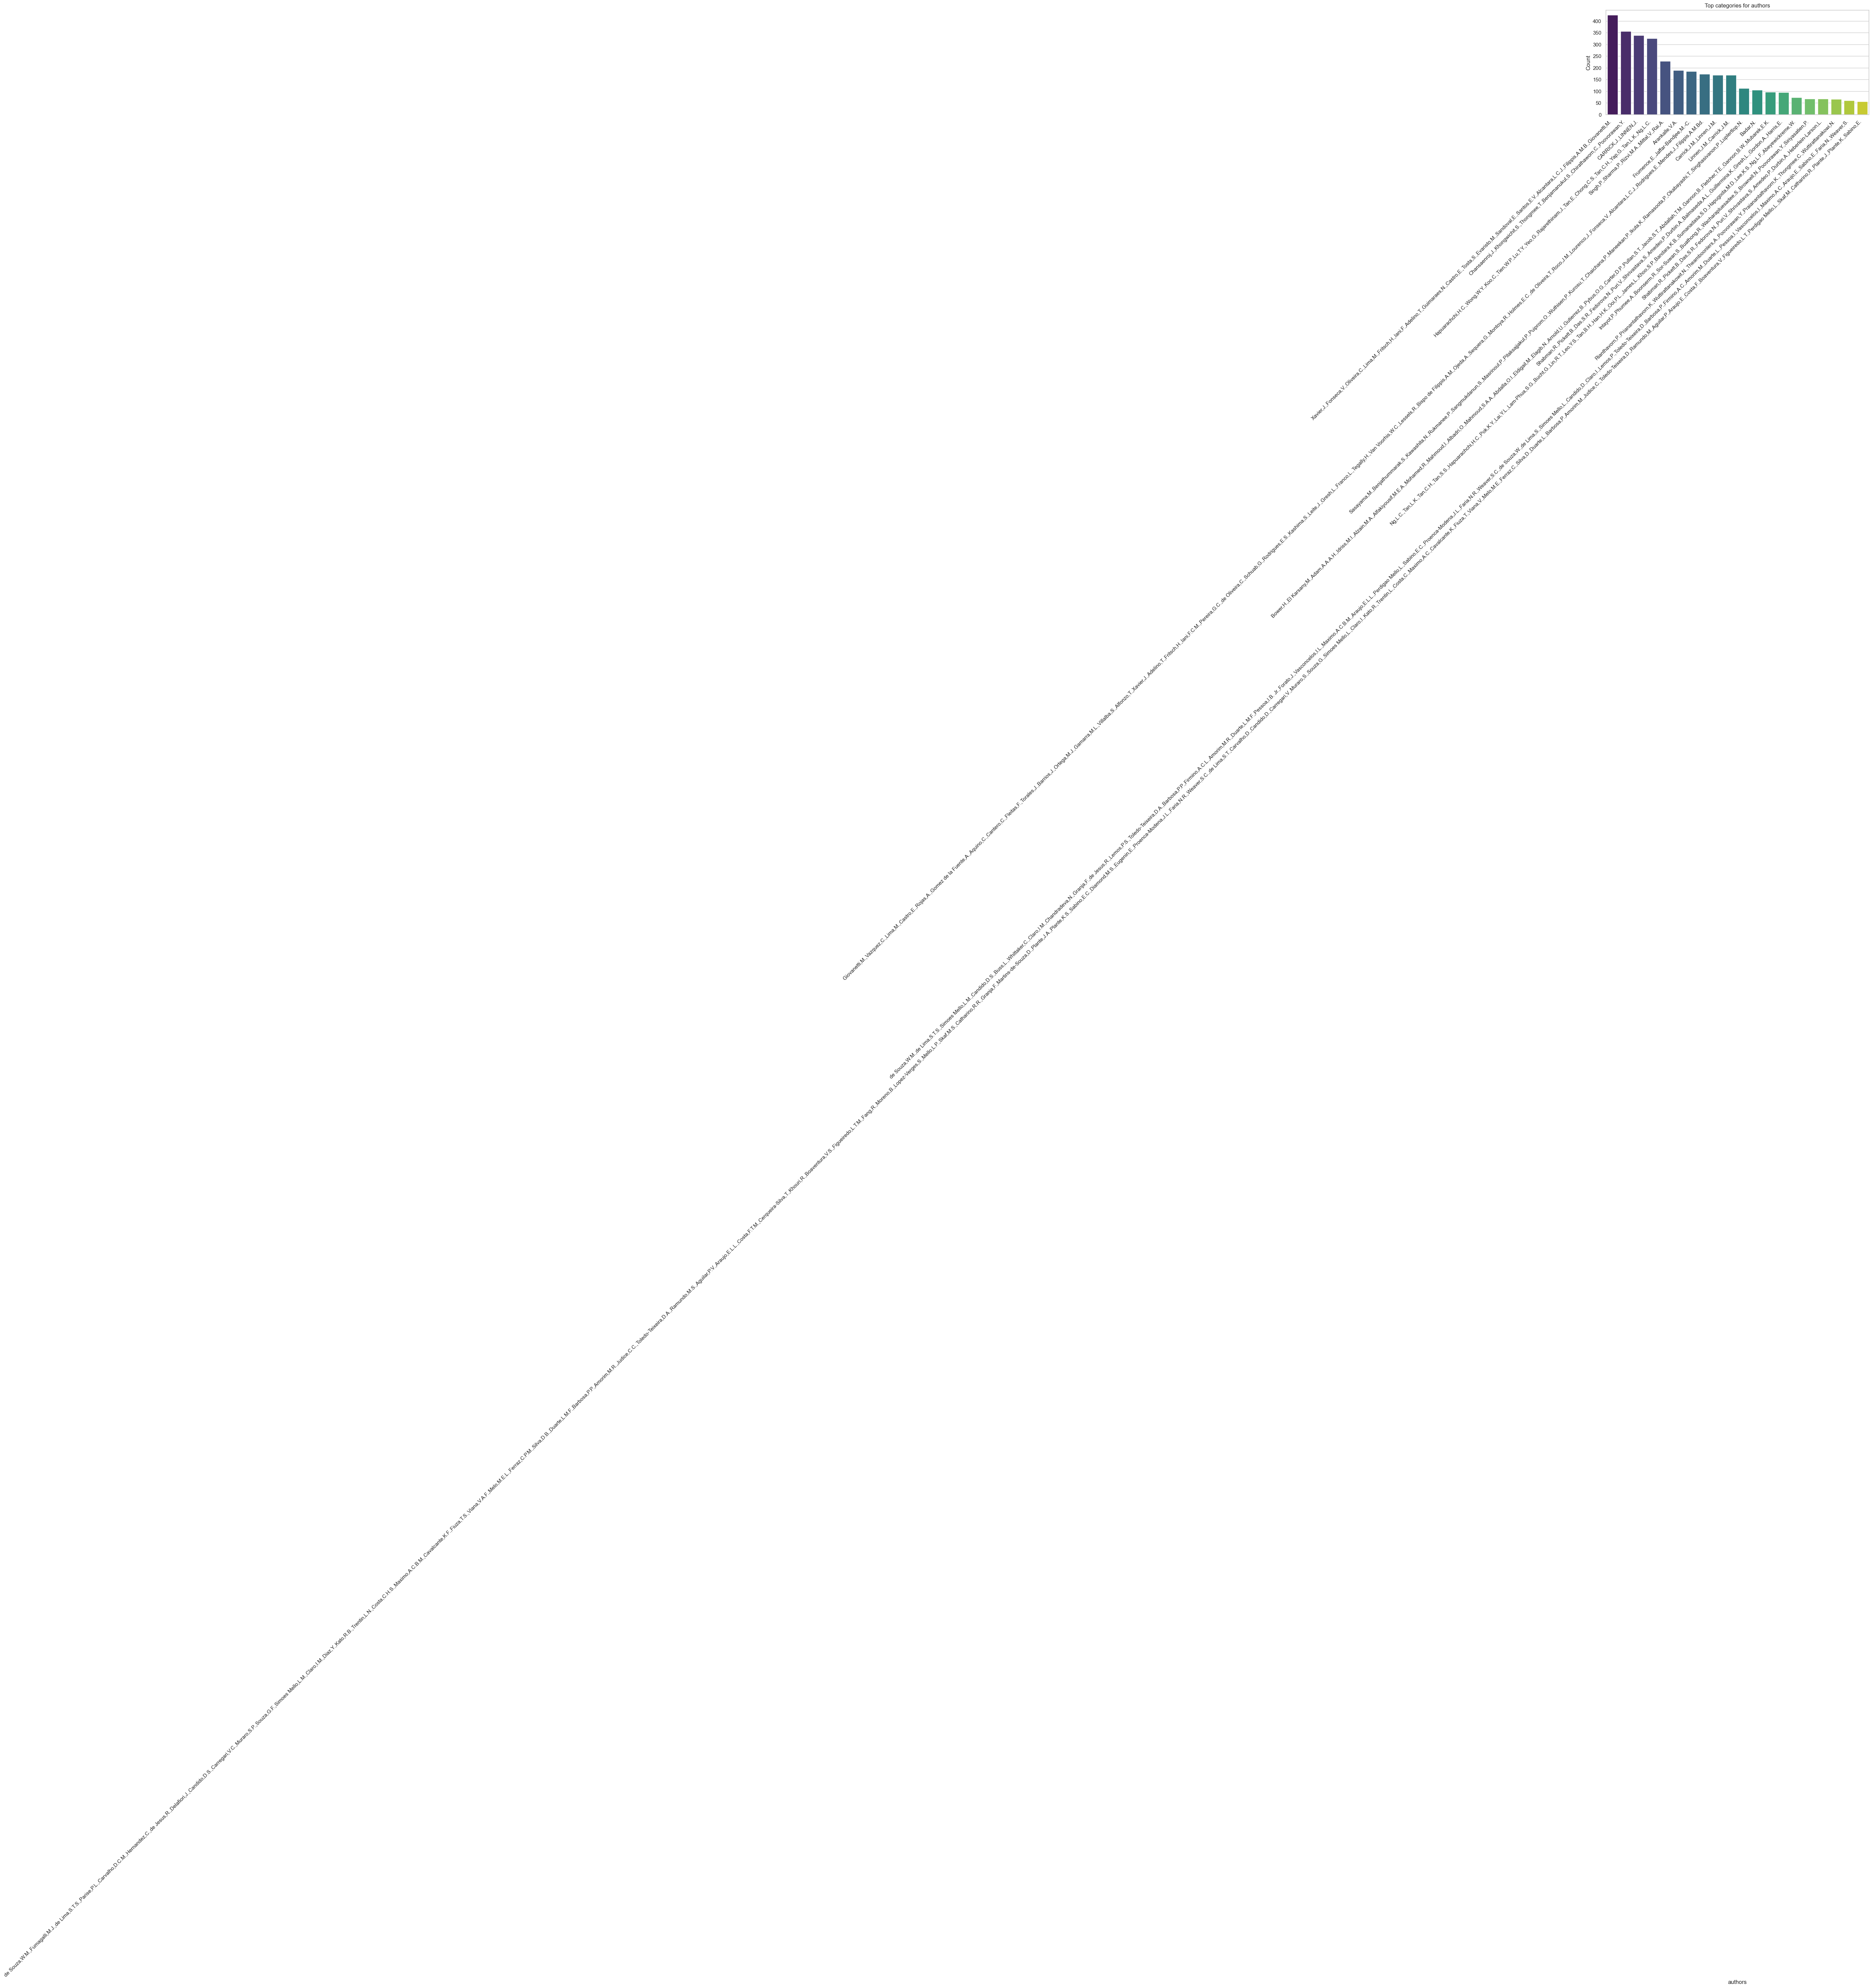

                                         institution  count
0                                            Missing   1024
1  Pan American Health Organization (PAHO), PHE-B...    703
2  National Environment Agency, Environmental Hea...    418
3  Faculty of Medical, Chulalongkorn University, ...    356
4  National Centre for Disease Control, Biochemis...    228


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")
/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/4278887848.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


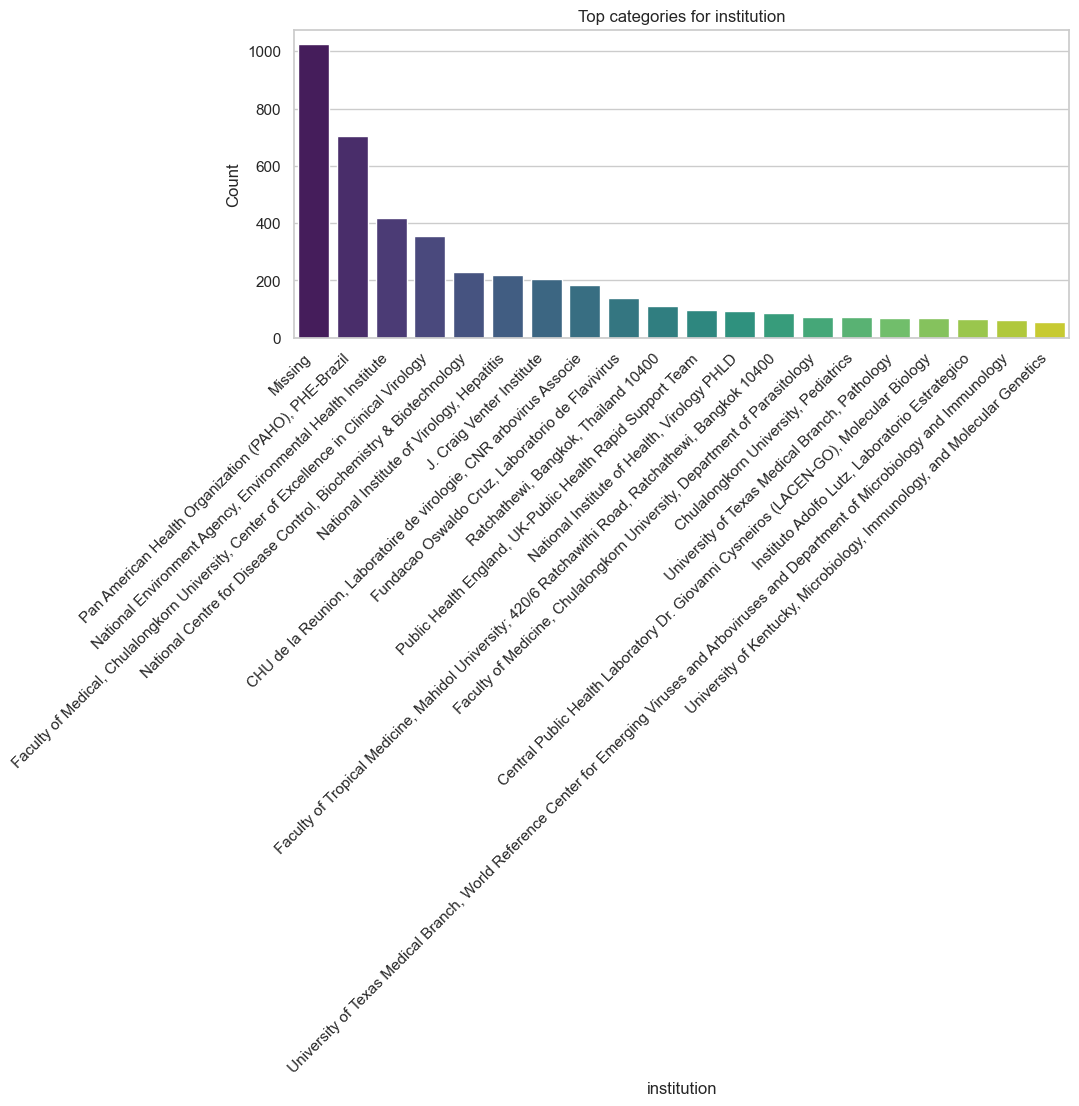

          clade  count
0       II-ECSA   6442
1     III-Asian   1296
2       Missing    747
3  I-WestAfrica    145
4    unassigned     78


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


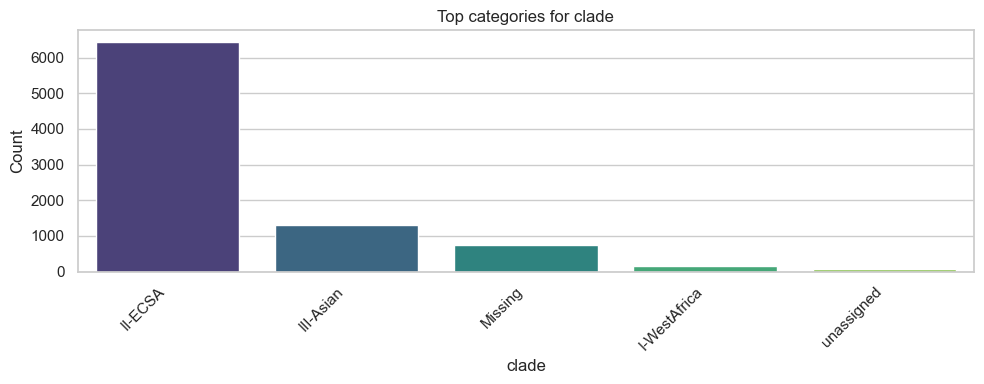

  qc.overallStatus  count
0             good   7428
1          Missing    747
2         mediocre    272
3              bad    261


/var/folders/w0/pzdl0rq53pd7lqhw_k66lsv80000gn/T/ipykernel_82022/4278887848.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x=col, y="count", palette="viridis")


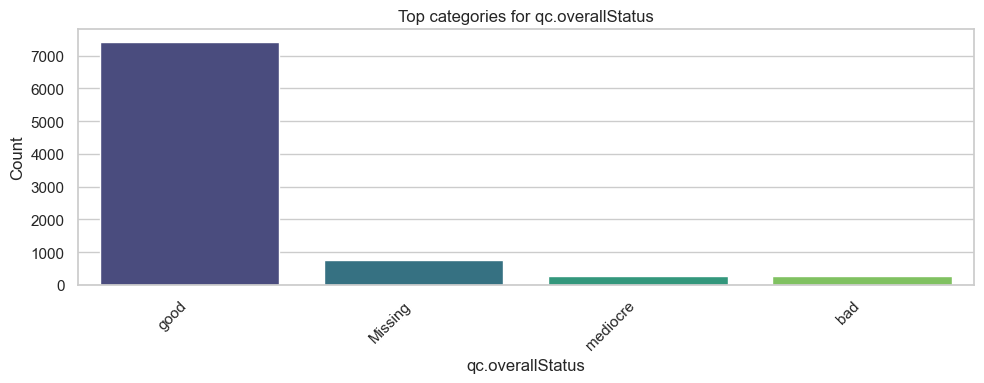

In [ ]:
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
print(categorical_cols)
if categorical_cols:
    for col in categorical_cols:
        n_unique = df[col].nunique(dropna=False)
        n_total = len(df[col])

        # Skip if every value is unique
        if n_unique == n_total:
            print(f"Skipping {col} (all values unique)")
            continue
        
        value_counts = (
            df[col]
            .fillna("Missing")
            .value_counts()
            .head(20)
            .reset_index()
        )
        value_counts.columns = [col, "count"]
        print(value_counts.head())
        plt.figure(figsize=(10, 4))
        sns.barplot(data=value_counts, x=col, y="count", palette="viridis")
        plt.title(f"Top categories for {col}")
        plt.ylabel("Count")
        plt.xlabel(col)
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()
else:
    print("No categorical columns found.")
